# Análise da Série histórica do levantamento de preços e de margens de comercialização de combustíveis

A ANP (Agência Nacional do Petróleo, Gás Natural e Biocombustíveis) disponibiliza a série histórica do Levantamento de Preços e de Margens de Comercialização de Combustíveis semanal e mensal. As séries históricas incluem os seguintes combustíveis: gasolina comum, etanol hidratado, óleo diesel não aditivado, gás natural veicular (GNV), gás liquefeito de petróleo (GLP – botijão de 13 quilos) e o óleo diesel S-10.

Aqui será analisada a série histórica semanal por estado da federação.

## Objetivos

* Realizar uma análise exploratória dos dados disponibilizados pela ANP.
* Determinar os estados em que houve a maior alta/baixa de preços de combustíveis no período disponível (2004 a 2020).
* Determinar os combustíveis que sofreram os maiores aumentos/as maiores baixas de preço no período disponível (2004 a 2020).
* Determinar o estado com o maior número de postos de combustíveis.
* Determinar o estado com a maior diferença entre o preço médio de distribuição e o preço médio de revenda.
* Determinar o estado com o maior/o menor preço de revenda de cada combustível.
* Determinar o produto mais barato/caro por estado.
* Determinar o produto mais barato/caro por região.
* Determinar o produto mais barato/caro no país.

### Análise Exploratória dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importando os dados
dados = pd.read_csv('Dados ANP/SerieHistorica_Estado_2004a2020.tsv', sep = '\t', na_values = ['-'], decimal = ',')

dados.head()

data_inicial  data_final        região              estado  \
0   09/05/2004  15/05/2004  CENTRO OESTE    DISTRITO FEDERAL   
1   09/05/2004  15/05/2004  CENTRO OESTE               GOIAS   
2   09/05/2004  15/05/2004  CENTRO OESTE         MATO GROSSO   
3   09/05/2004  15/05/2004  CENTRO OESTE  MATO GROSSO DO SUL   
4   09/05/2004  15/05/2004      NORDESTE             ALAGOAS   

            produto  número_de_postos_pesquisados unidade_de_medida  \
0  ETANOL HIDRATADO                           127              R$/l   
1  ETANOL HIDRATADO                           387              R$/l   
2  ETANOL HIDRATADO                           192              R$/l   
3  ETANOL HIDRATADO                           162              R$/l   
4  ETANOL HIDRATADO                           103              R$/l   

   preço_médio_revenda  desvio_padrão_revenda  preço_mínimo_revenda  \
0                1.288                  0.016                  1.19   
1                1.162                  0.114                  0.89   
2                1.389                  0.097                  1.18   
3                1.262                  0.070                  1.09   
4                1.181                  0.078                  1.05   

   preço_máximo_revenda  margem_média_revenda  coef_de_variação_revenda  \
0                 1.350                 0.463                     0.012   
1                 1.449                 0.399                     0.098   
2                 1.760                 0.419                     0.070   
3                 1.509                 0.432                     0.055   
4                 1.400                 0.240                     0.066   

   preço_médio_distribuição  desvio_padrão_distribuição  \
0                     0.825                       0.110   
1                     0.763                       0.088   
2                     0.970                       0.095   
3                     0.830                       0.119   
4                     0.941                       0.077   

   preço_mínimo_distribuição  preço_máximo_distribuição  \
0                      0.420                      0.967   
1                      0.501                      1.050   
2                      0.561                      1.161   
3                      0.599                      1.222   
4                      0.744                      1.032   

   coef_de_variação_distribuição  
0                          0.133  
1                          0.115  
2                          0.098  
3                          0.143  
4                          0.082

In [2]:
dados.dtypes

data_inicial                      object
data_final                        object
região                            object
estado                            object
produto                           object
número_de_postos_pesquisados       int64
unidade_de_medida                 object
preço_médio_revenda              float64
desvio_padrão_revenda            float64
preço_mínimo_revenda             float64
preço_máximo_revenda             float64
margem_média_revenda             float64
coef_de_variação_revenda         float64
preço_médio_distribuição         float64
desvio_padrão_distribuição       float64
preço_mínimo_distribuição        float64
preço_máximo_distribuição        float64
coef_de_variação_distribuição    float64
dtype: object

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111492 entries, 0 to 111491
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   data_inicial                   111492 non-null  object 
 1   data_final                     111492 non-null  object 
 2   região                         111492 non-null  object 
 3   estado                         111492 non-null  object 
 4   produto                        111492 non-null  object 
 5   número_de_postos_pesquisados   111492 non-null  int64  
 6   unidade_de_medida              111492 non-null  object 
 7   preço_médio_revenda            111492 non-null  float64
 8   desvio_padrão_revenda          111492 non-null  float64
 9   preço_mínimo_revenda           111492 non-null  float64
 10  preço_máximo_revenda           111492 non-null  float64
 11  margem_média_revenda           107943 non-null  float64
 12  coef_de_variação_revenda      

In [4]:
print(f'Dimensões: {dados.shape} ({dados.ndim} dimensões)\nLinhas: {len(dados)} Colunas: {len(dados.iloc[0])}')

Dimensões: (111492, 18) (2 dimensões)
Linhas: 111492 Colunas: 18


In [5]:
dados.describe(include = 'all')

data_inicial  data_final    região          estado      produto  \
count        111492      111492    111492          111492       111492   
unique          816         816         5              27            6   
top      15/12/2019  21/12/2019  NORDESTE  RIO DE JANEIRO  ÓLEO DIESEL   
freq            154         154     38483            4449        22031   
mean            NaN         NaN       NaN             NaN          NaN   
std             NaN         NaN       NaN             NaN          NaN   
min             NaN         NaN       NaN             NaN          NaN   
25%             NaN         NaN       NaN             NaN          NaN   
50%             NaN         NaN       NaN             NaN          NaN   
75%             NaN         NaN       NaN             NaN          NaN   
max             NaN         NaN       NaN             NaN          NaN   

        número_de_postos_pesquisados unidade_de_medida  preço_médio_revenda  \
count                  111492.000000            111492        111492.000000   
unique                           NaN                 3                  NaN   
top                              NaN              R$/l                  NaN   
freq                             NaN             75935                  NaN   
mean                      230.515911               NaN            11.089334   
std                       398.361549               NaN            18.230533   
min                         1.000000               NaN             0.766000   
25%                        41.000000               NaN             2.096000   
50%                       103.000000               NaN             2.768000   
75%                       238.000000               NaN             3.844000   
max                      4167.000000               NaN            99.357000   

        desvio_padrão_revenda  preço_mínimo_revenda  preço_máximo_revenda  \
count           111492.000000         111492.000000         111492.000000   
unique                    NaN                   NaN                   NaN   
top                       NaN                   NaN                   NaN   
freq                      NaN                   NaN                   NaN   
mean                 0.671171              9.610585             12.808419   
std                  1.379961             15.516997             21.449208   
min                  0.000000              0.590000              0.999000   
25%                  0.073000              1.940000              2.369000   
50%                  0.116000              2.579000              3.090000   
75%                  0.195000              3.599000              4.299000   
max                 10.748000             90.000000            120.000000   

        margem_média_revenda  coef_de_variação_revenda  \
count          107943.000000             111492.000000   
unique                   NaN                       NaN   
top                      NaN                       NaN   
freq                     NaN                       NaN   
mean                2.273384                  0.045403   
std                 4.481703                  0.024965   
min                 0.001000                  0.000000   
25%                 0.286000                  0.029000   
50%                 0.387000                  0.041000   
75%                 0.567000                  0.058000   
max                36.847000                  0.395000   

        preço_médio_distribuição  desvio_padrão_distribuição  \
count              107976.000000               107976.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    8.747186                    0.571824   
std                    14.002308                    1.289902   
min                     0.506000                    0.000000   
25%                     1.818000   

In [6]:
dados.isnull().sum()

data_inicial                        0
data_final                          0
região                              0
estado                              0
produto                             0
número_de_postos_pesquisados        0
unidade_de_medida                   0
preço_médio_revenda                 0
desvio_padrão_revenda               0
preço_mínimo_revenda                0
preço_máximo_revenda                0
margem_média_revenda             3549
coef_de_variação_revenda            0
preço_médio_distribuição         3516
desvio_padrão_distribuição       3516
preço_mínimo_distribuição        3516
preço_máximo_distribuição        3516
coef_de_variação_distribuição    3516
dtype: int64

In [7]:
dados['ano'] = pd.to_datetime(dados.data_final).dt.year
anos = dados.ano.unique().tolist()

C:\Users\davir\Anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\davir\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


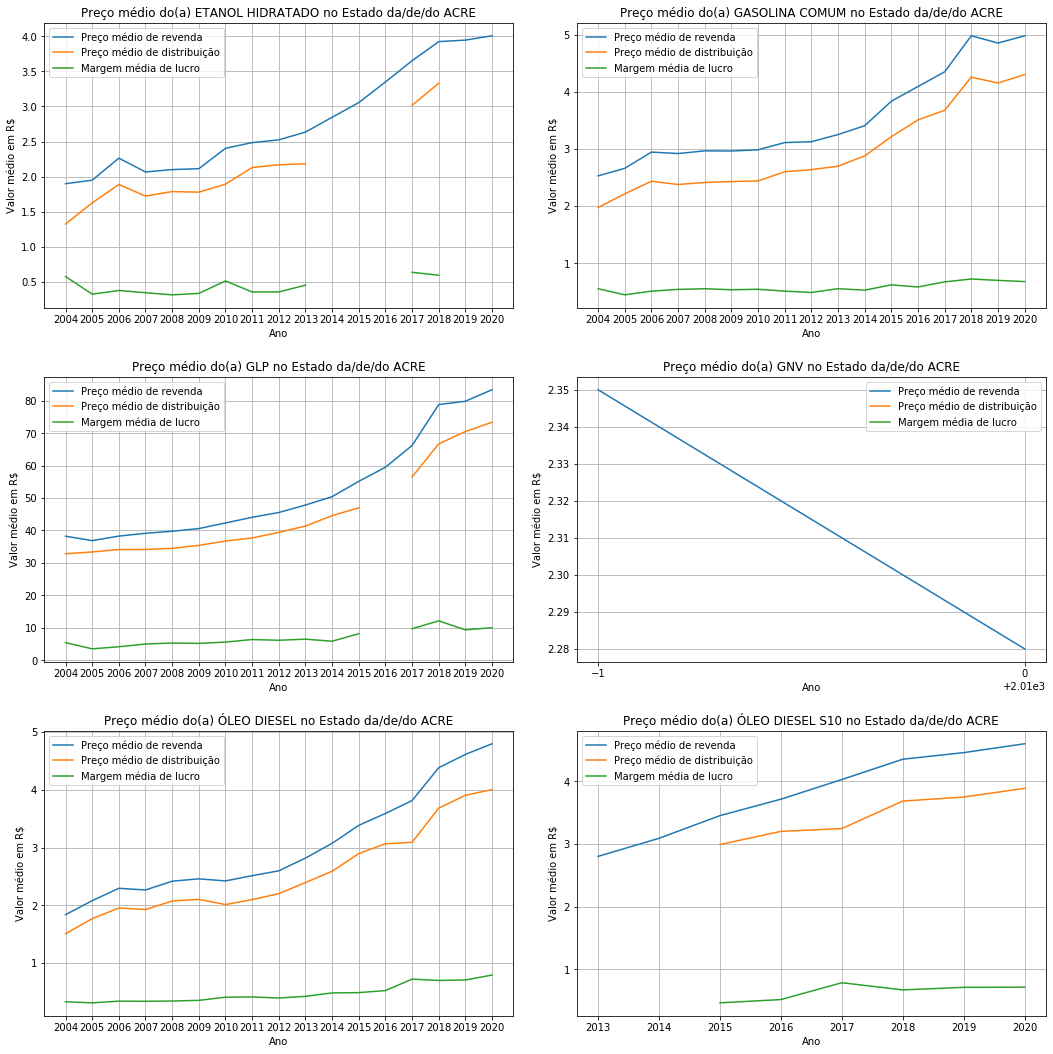

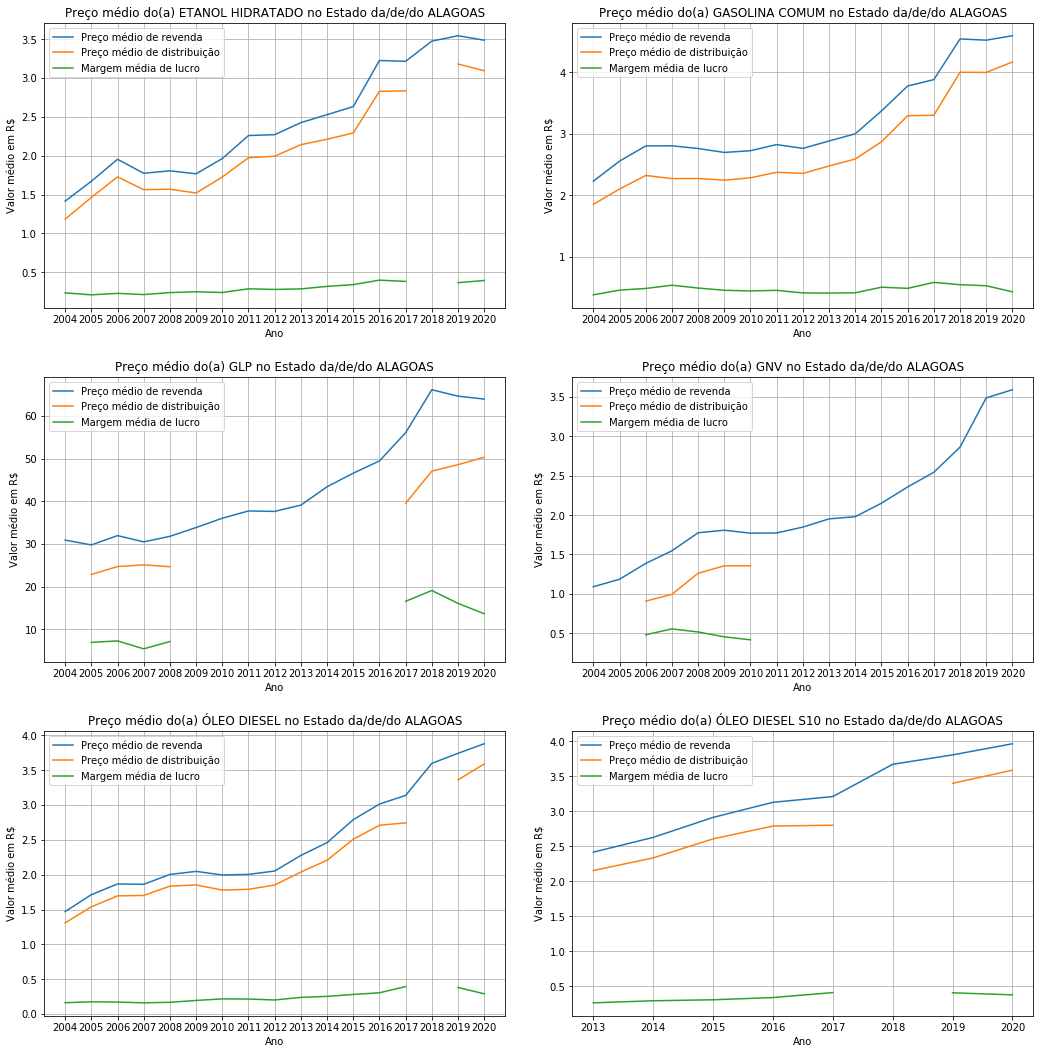

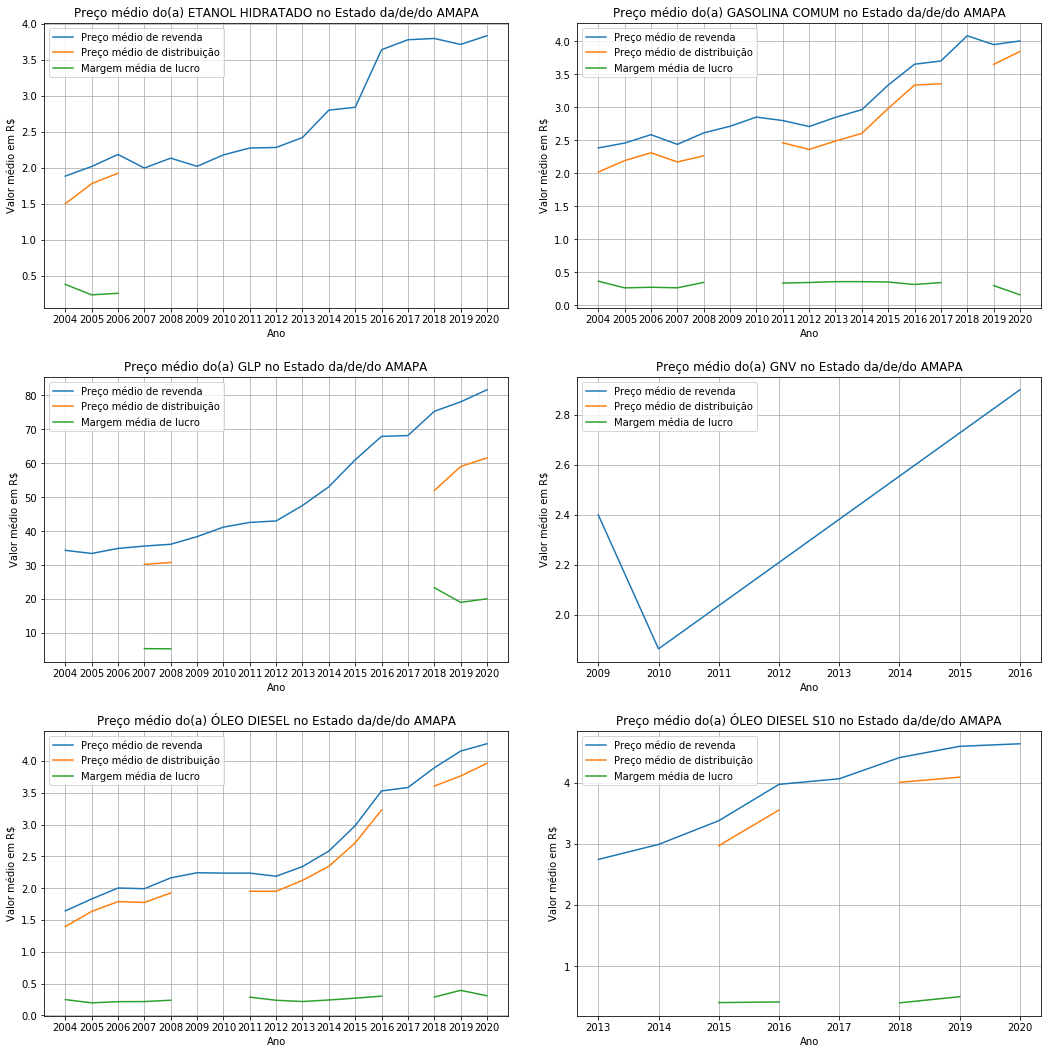

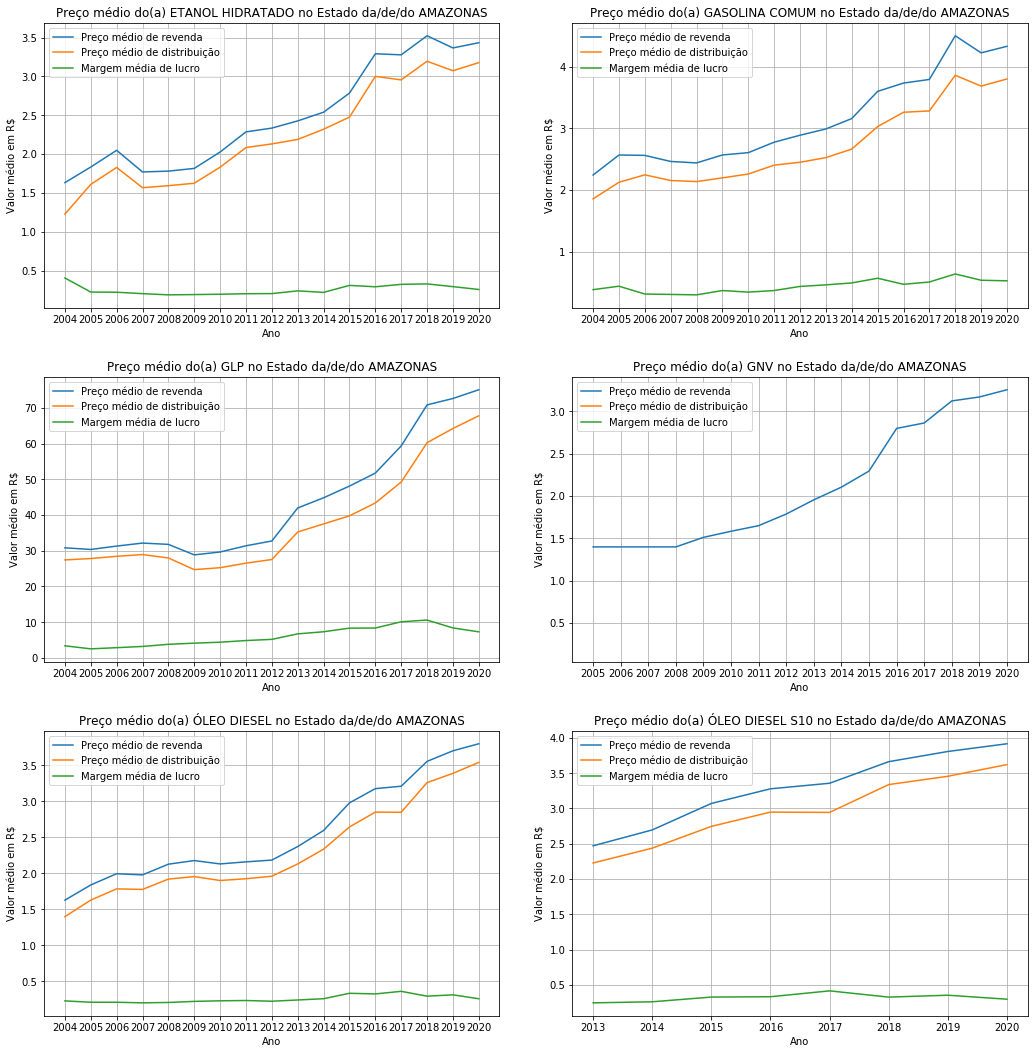

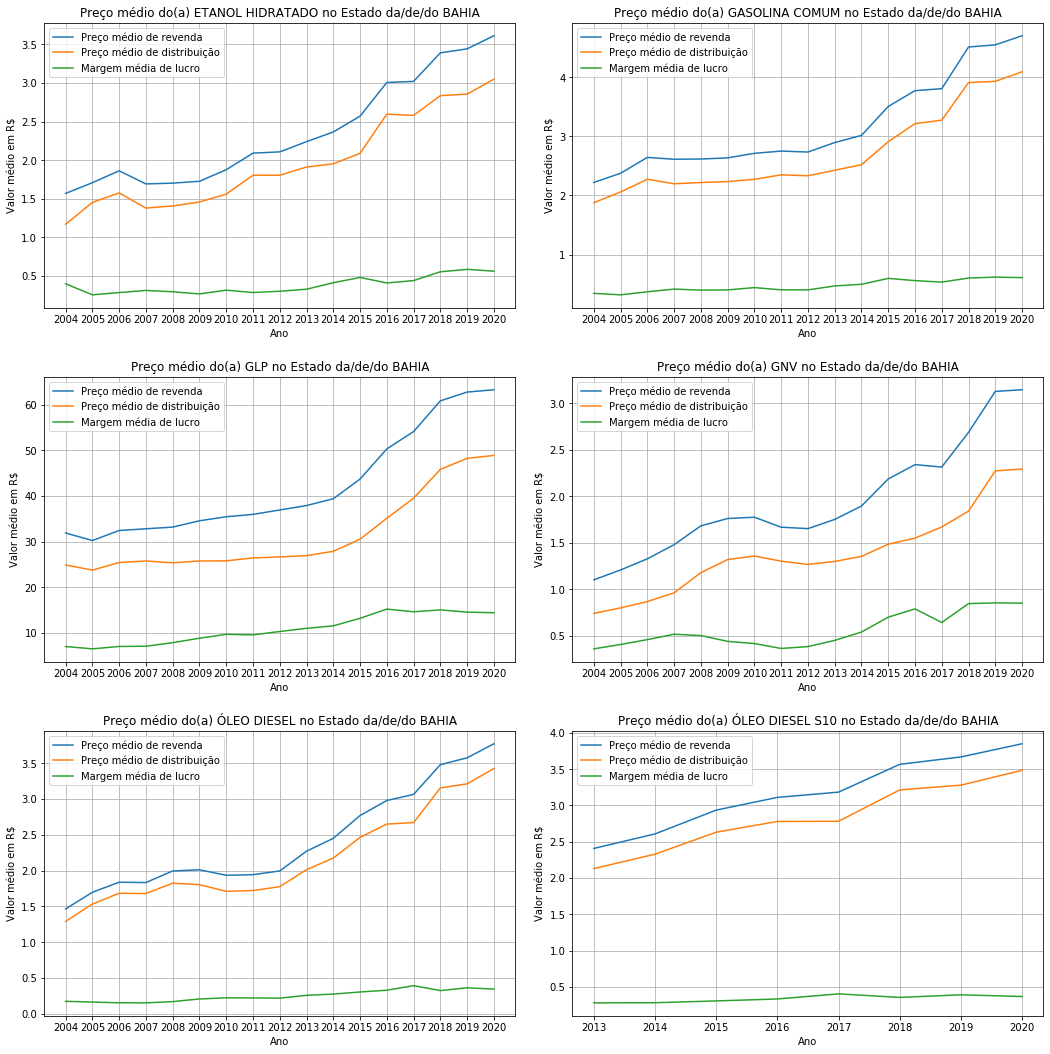

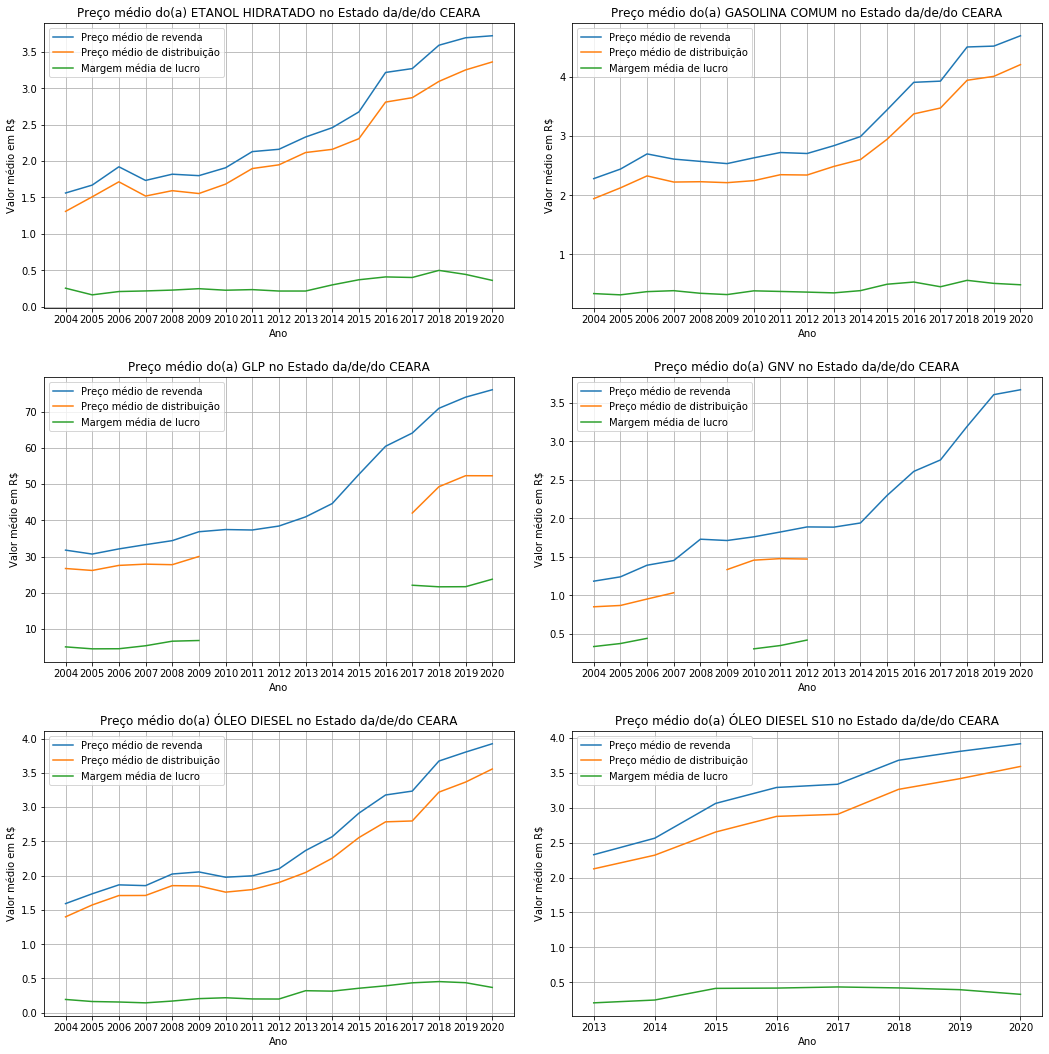

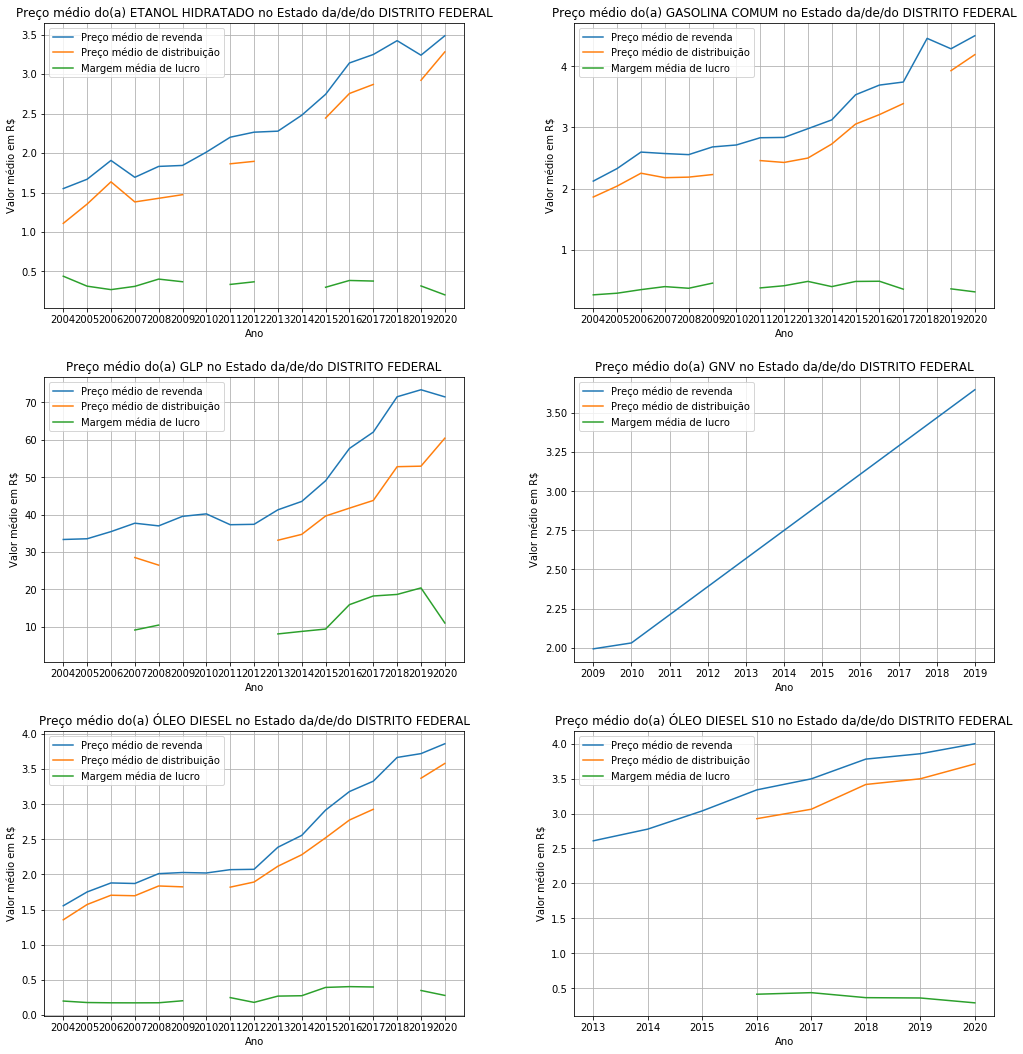

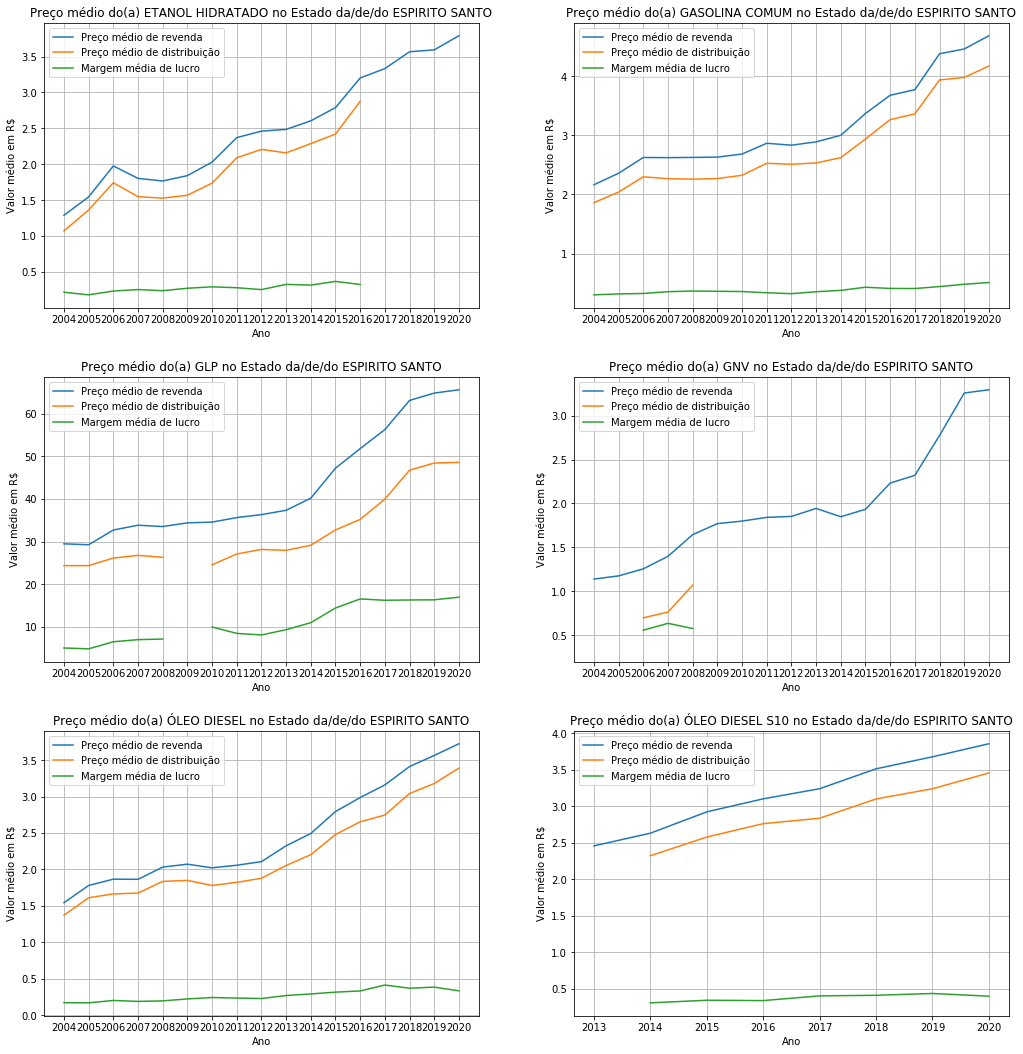

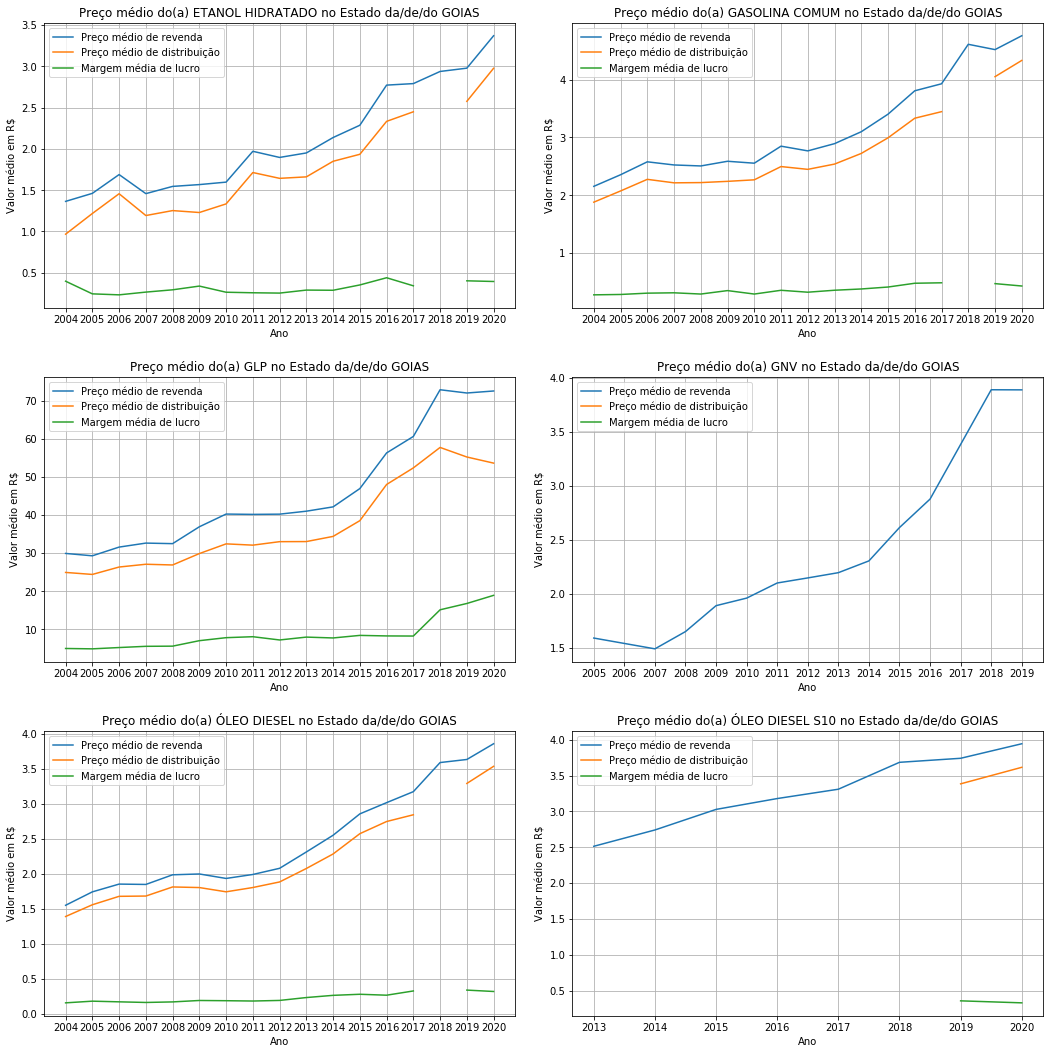

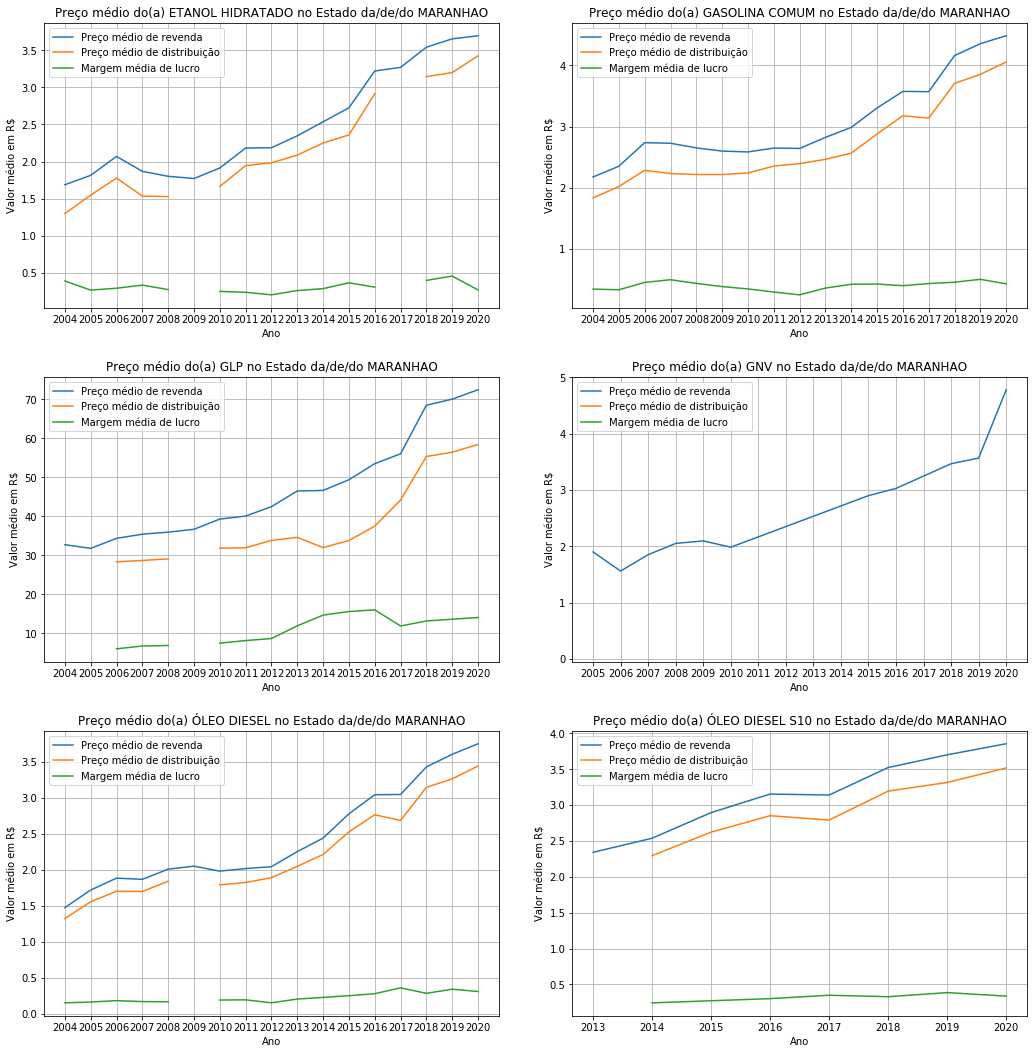

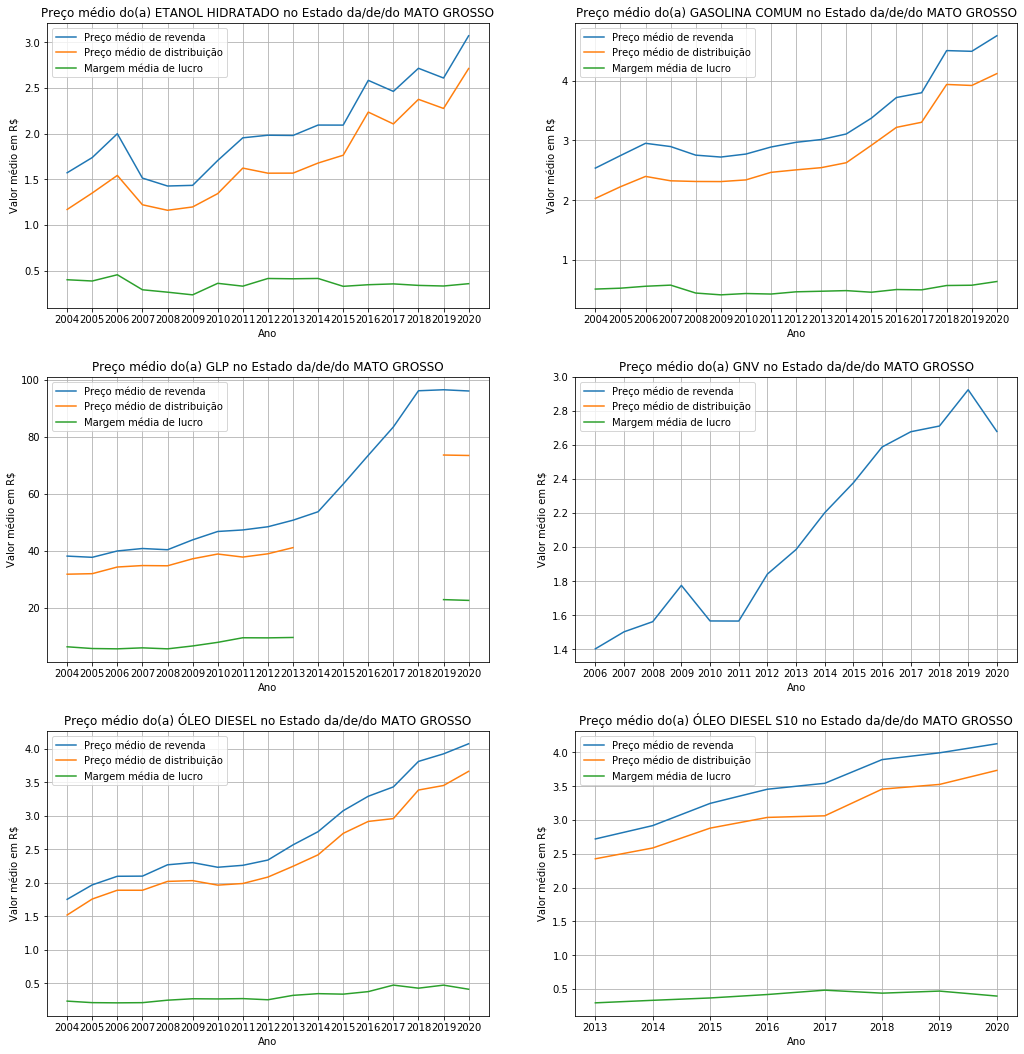

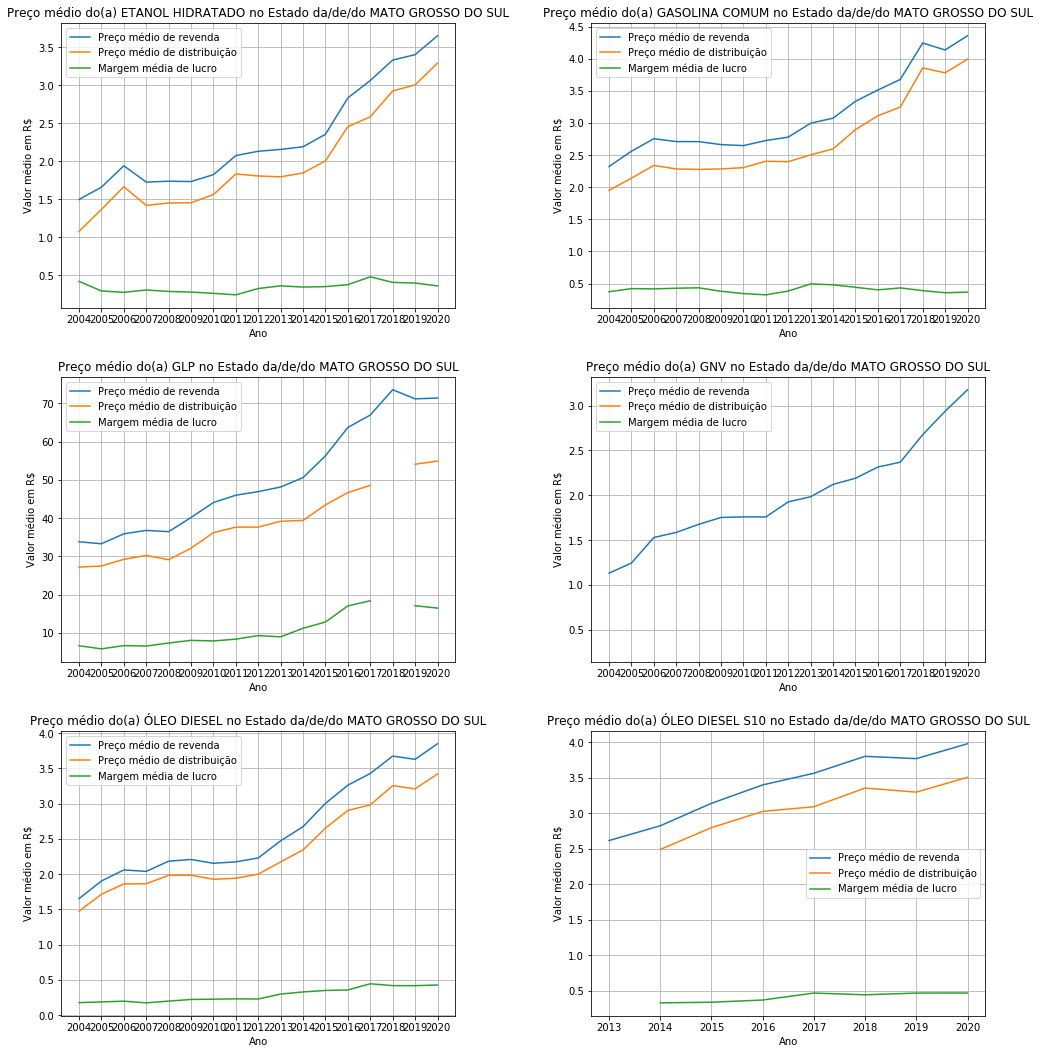

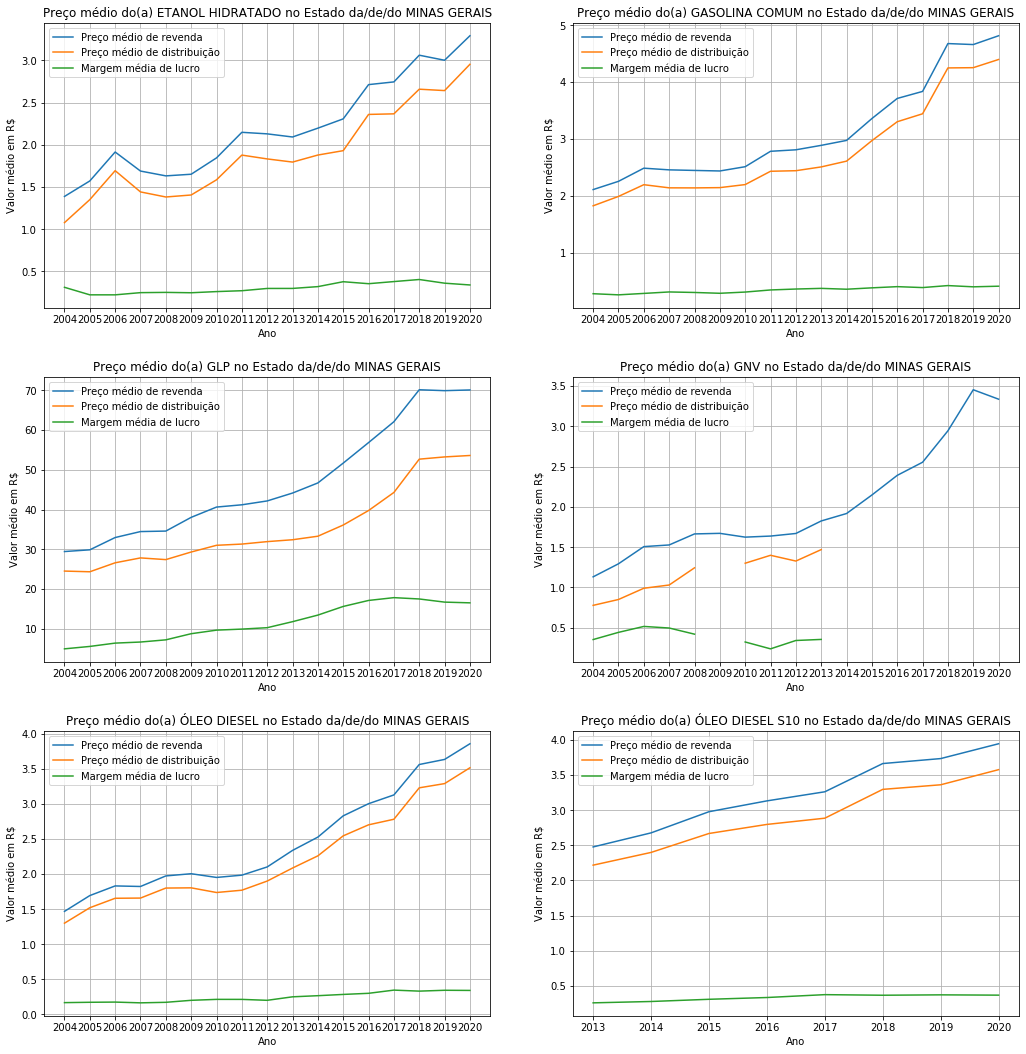

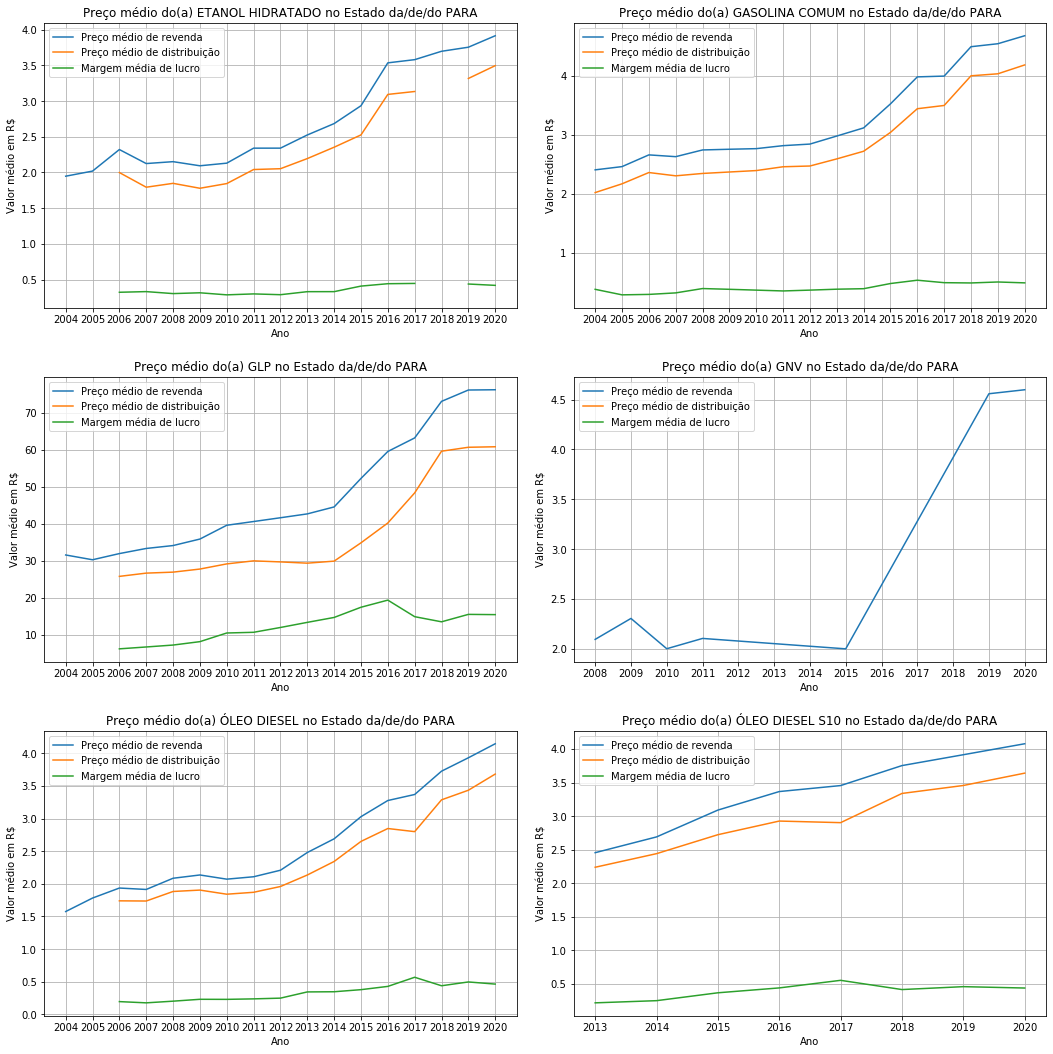

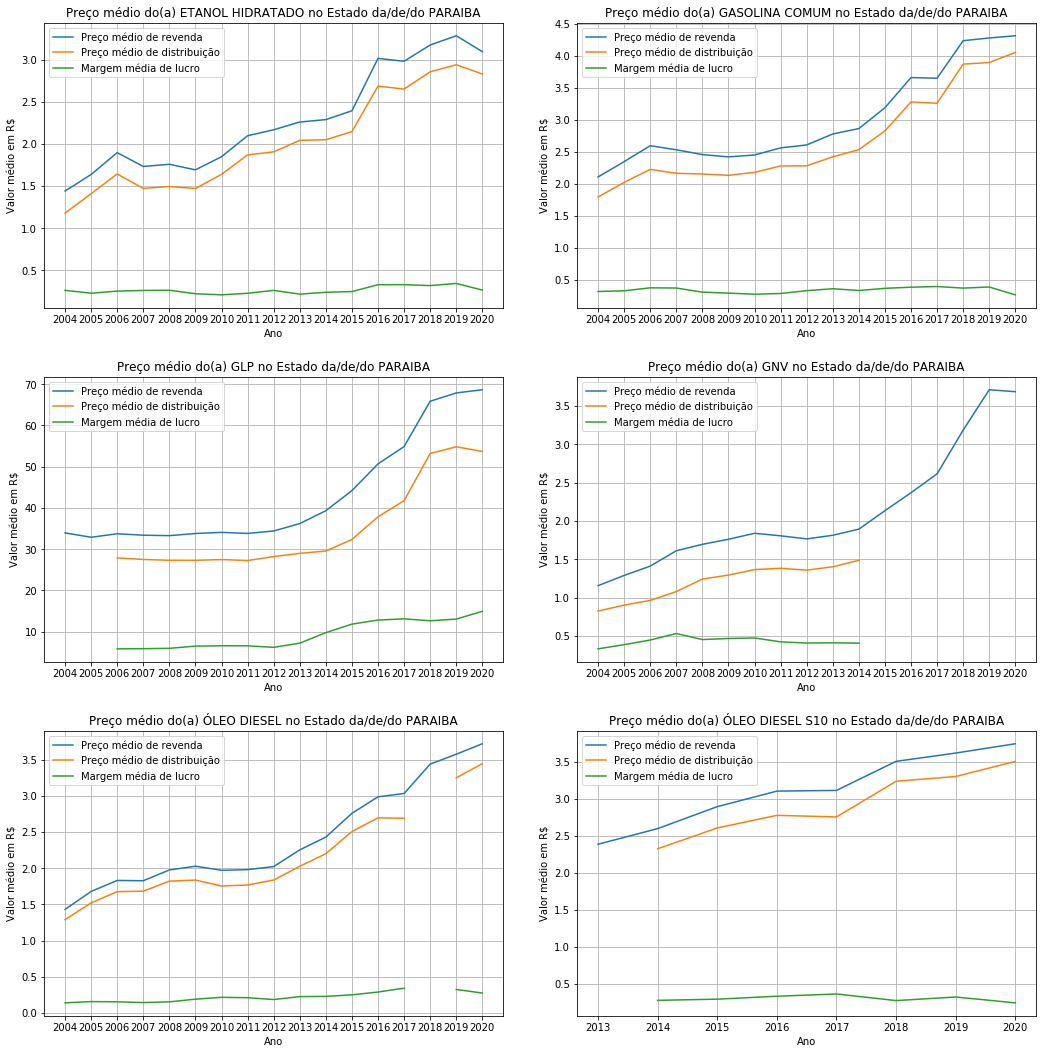

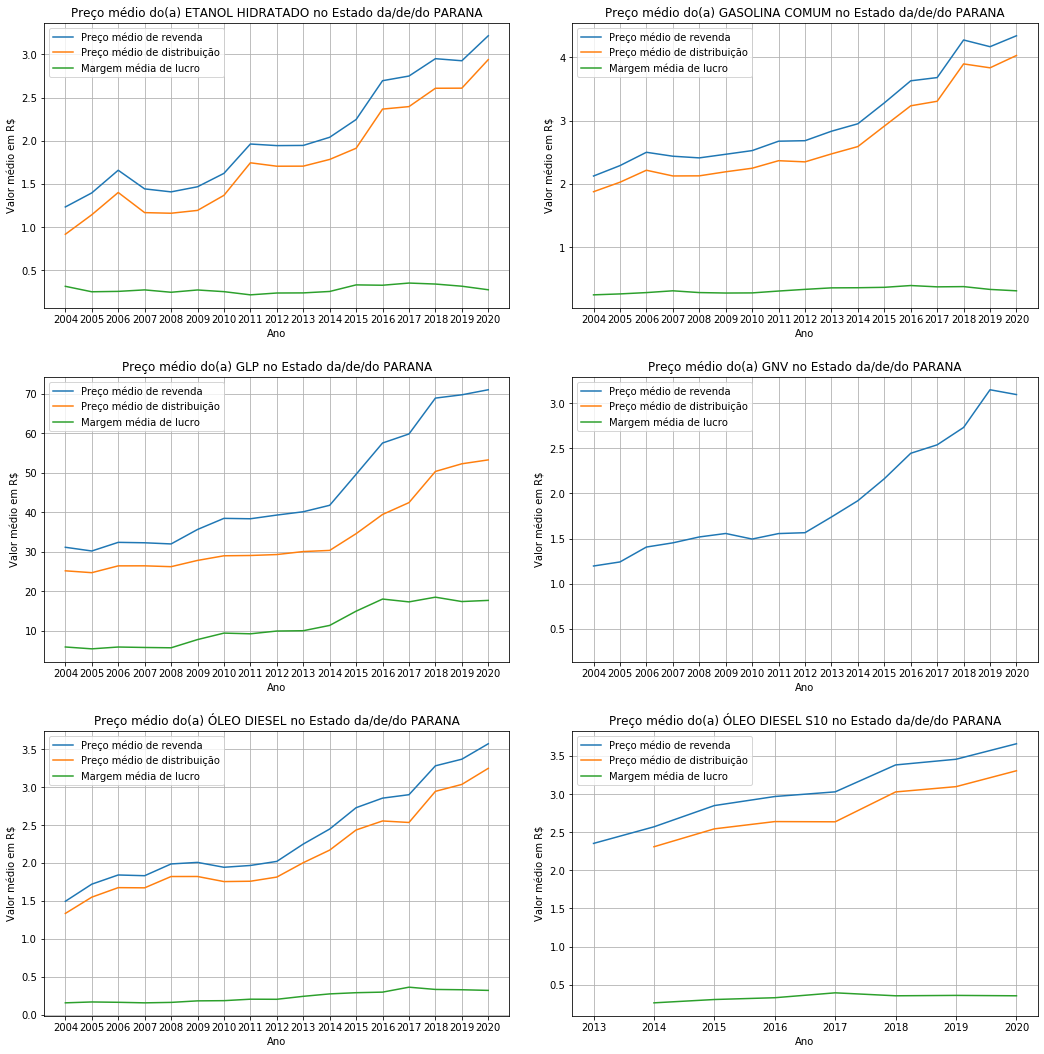

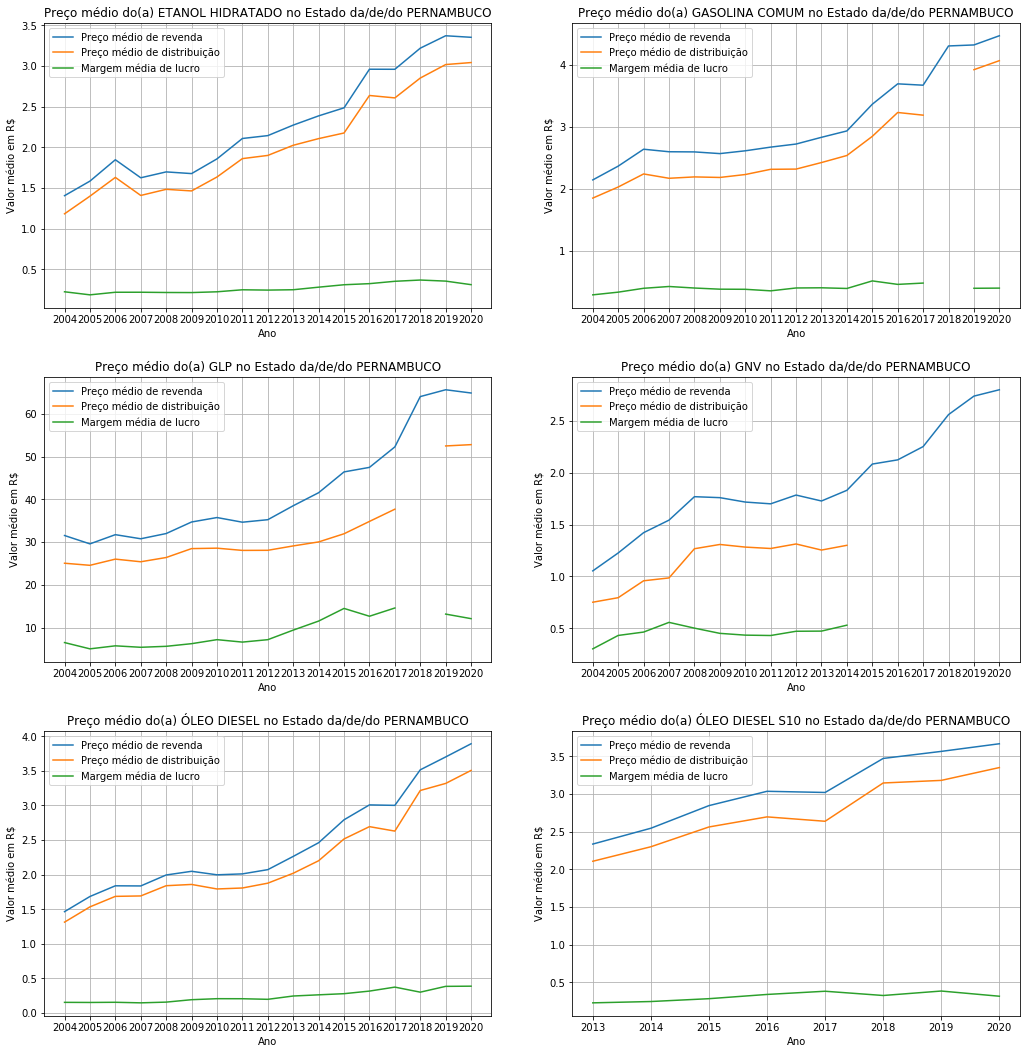

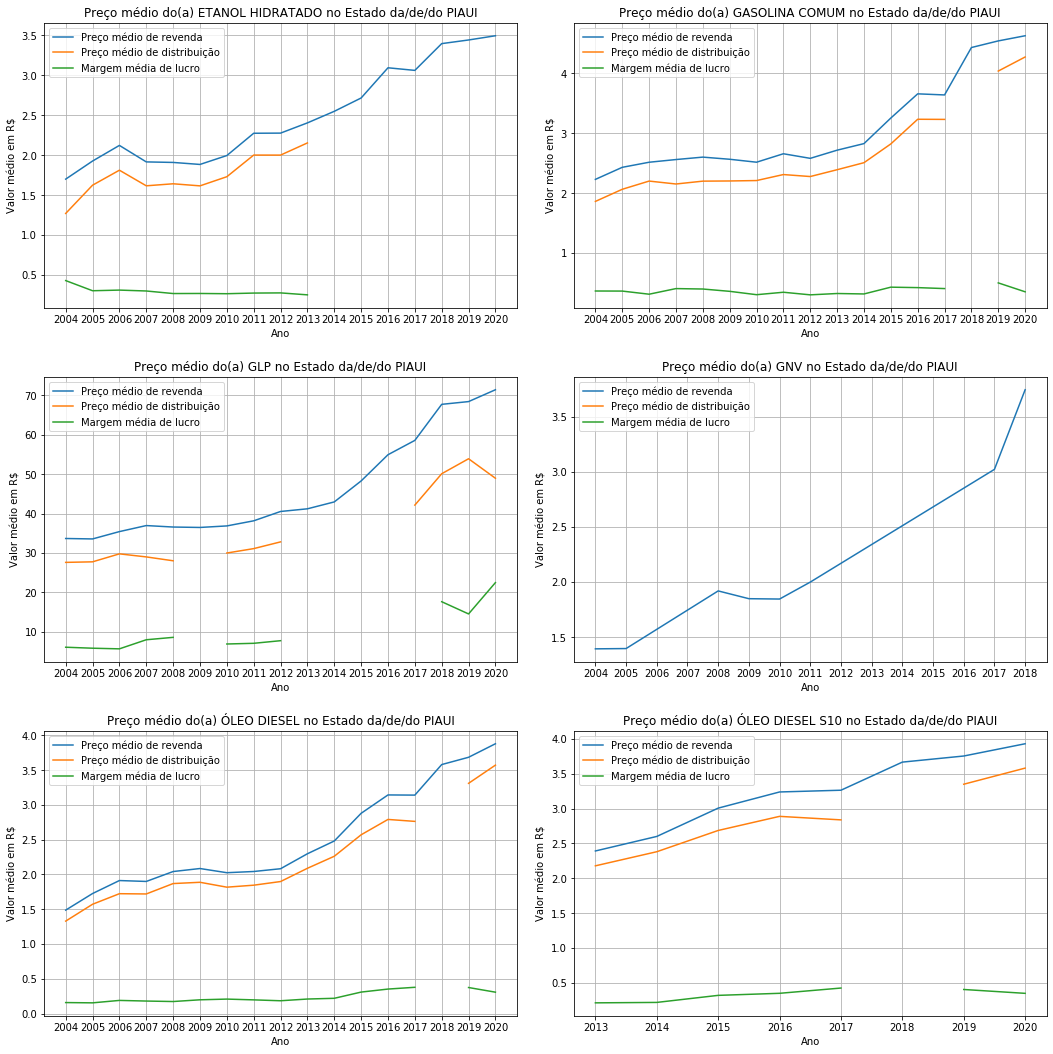

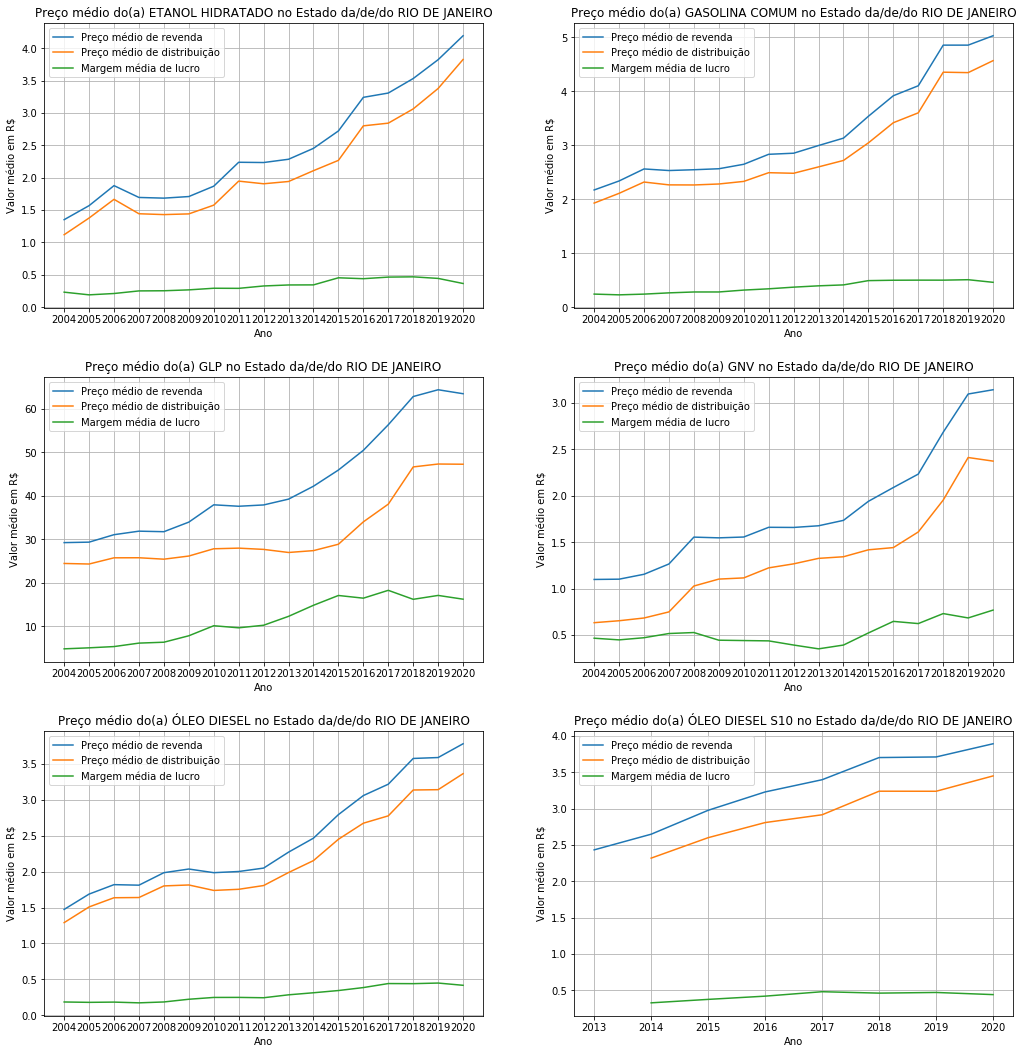

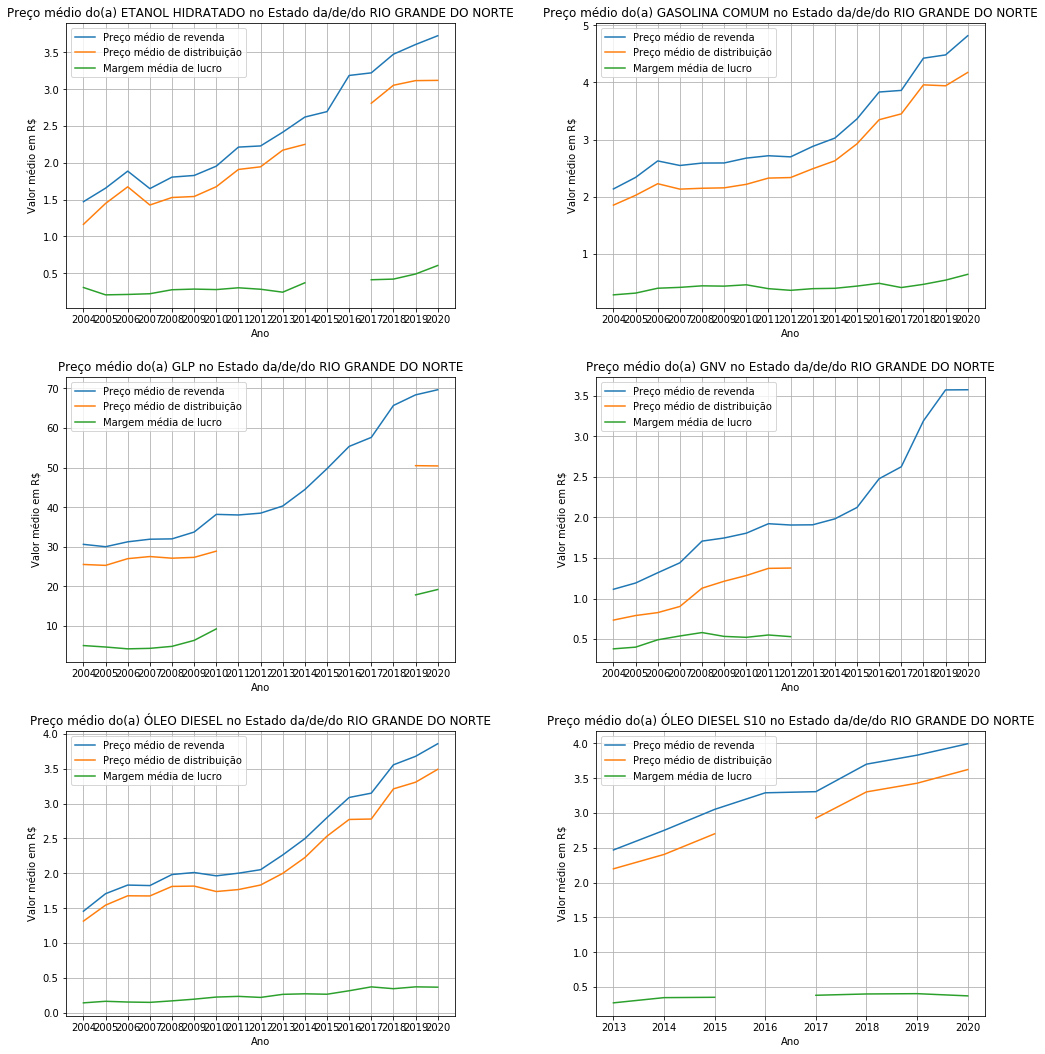

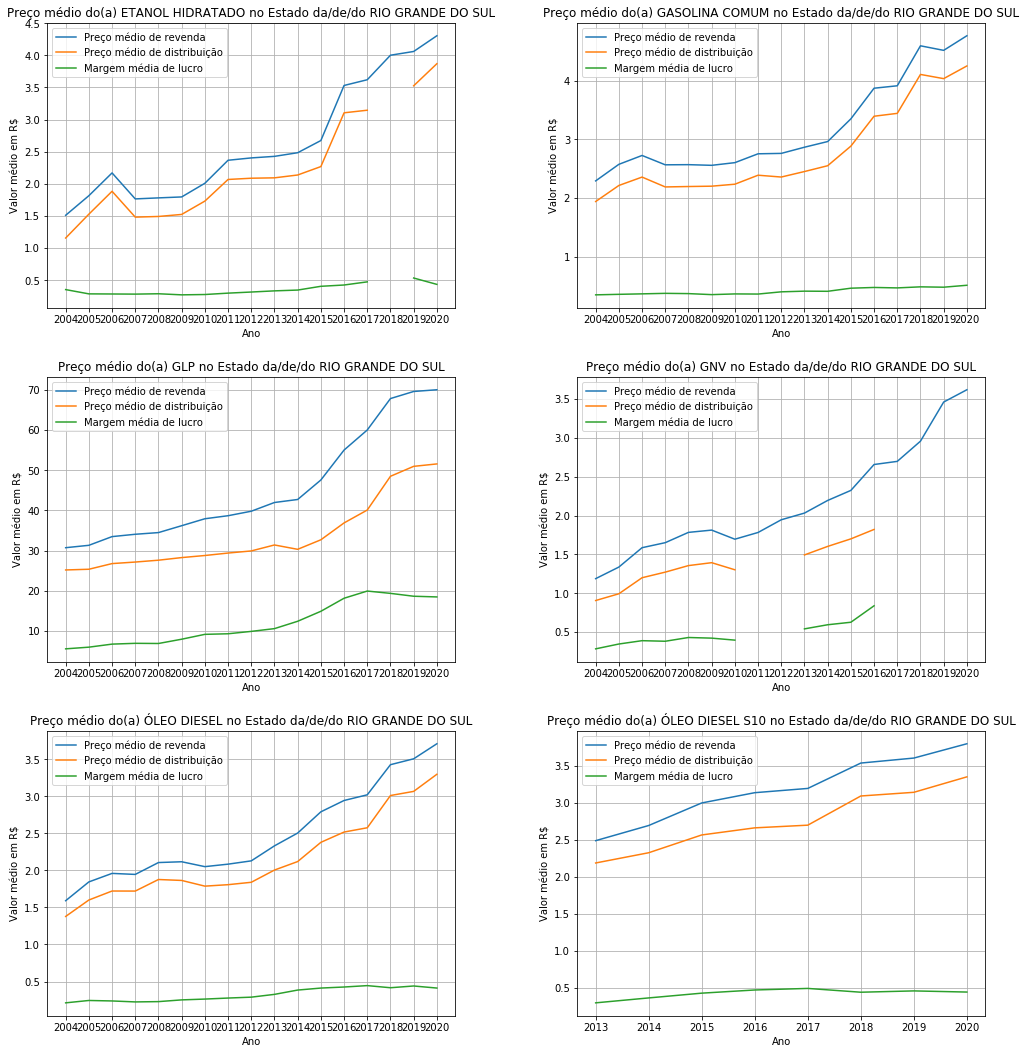

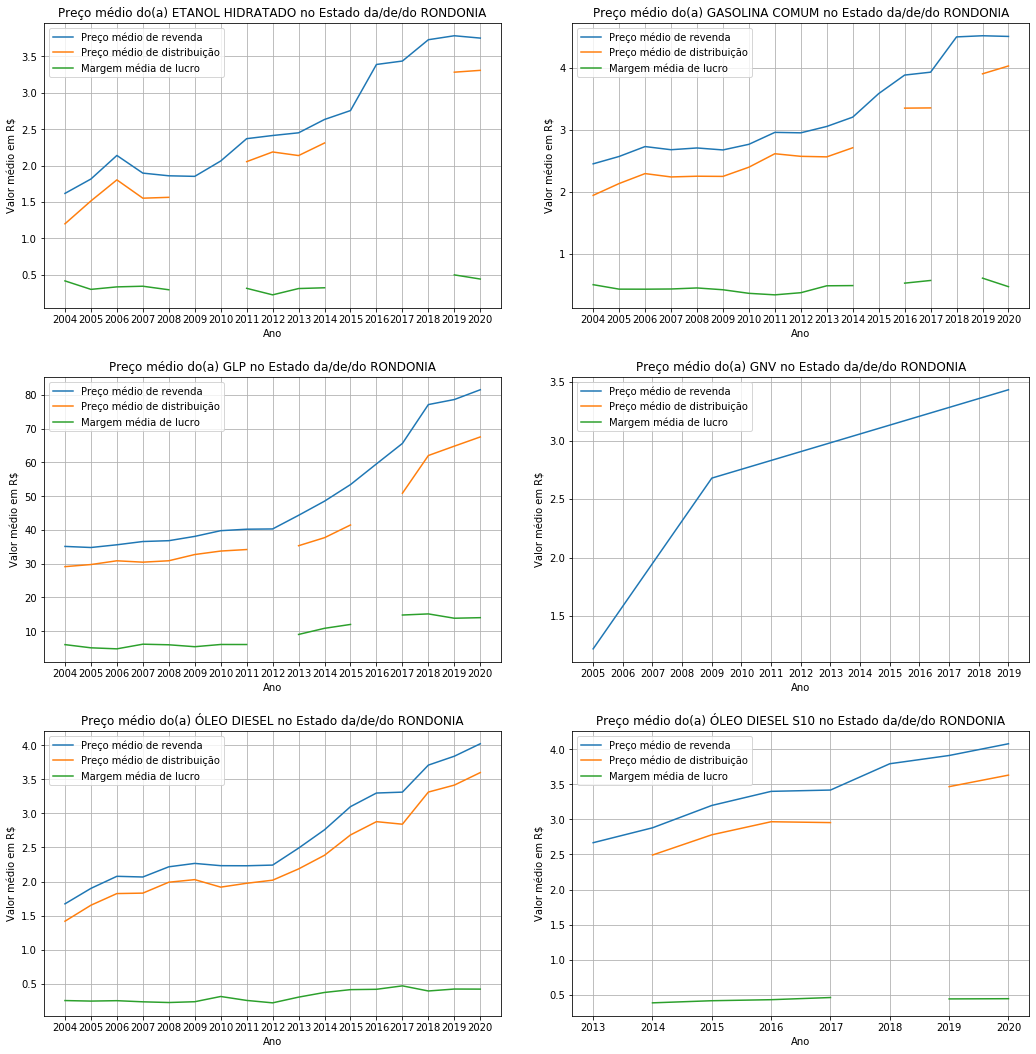

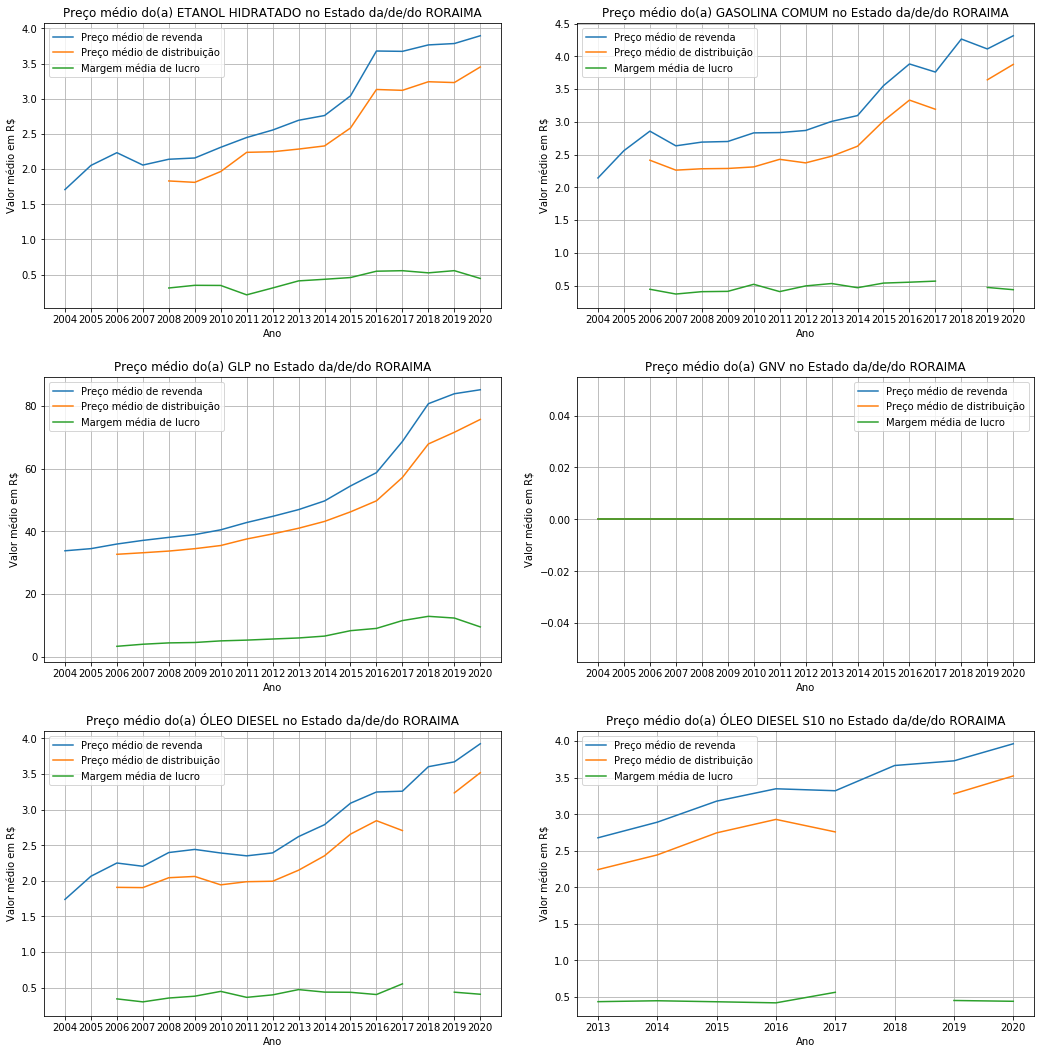

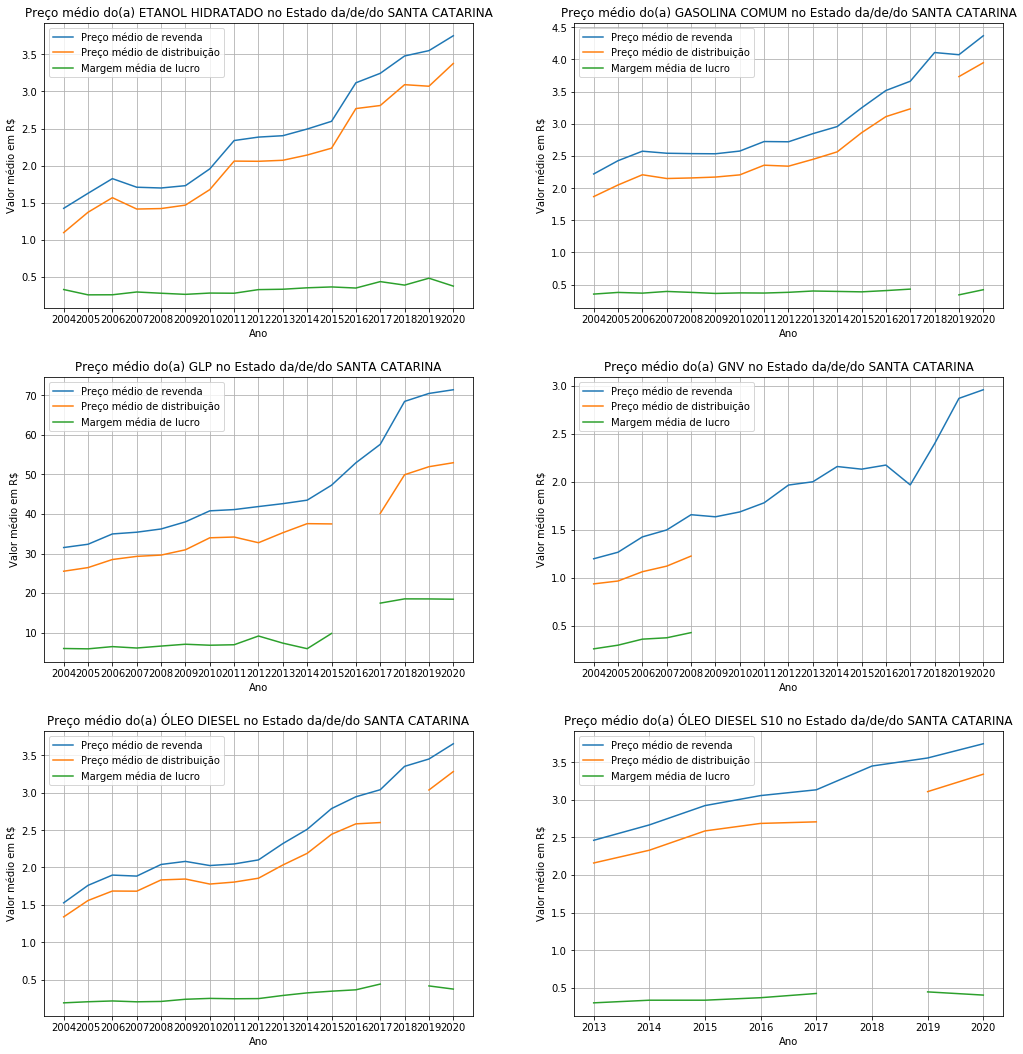

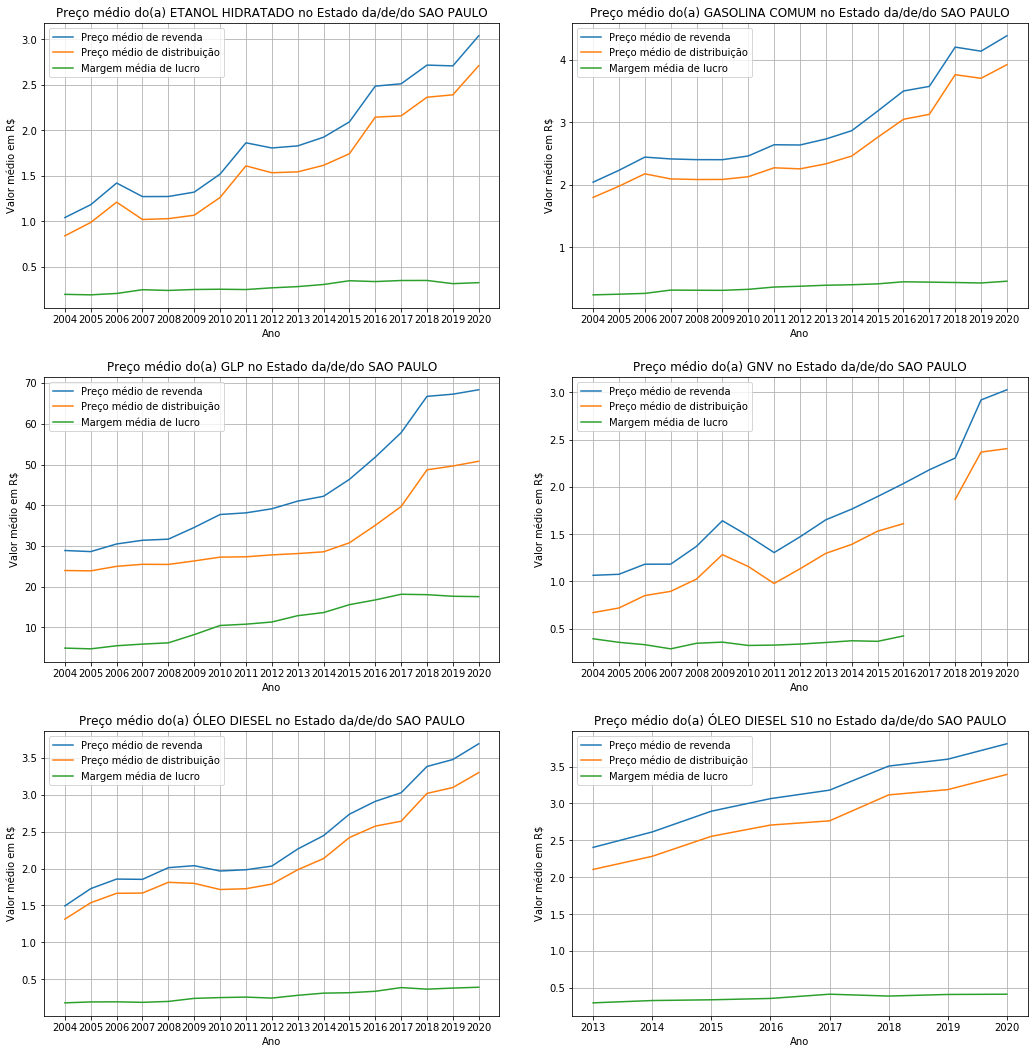

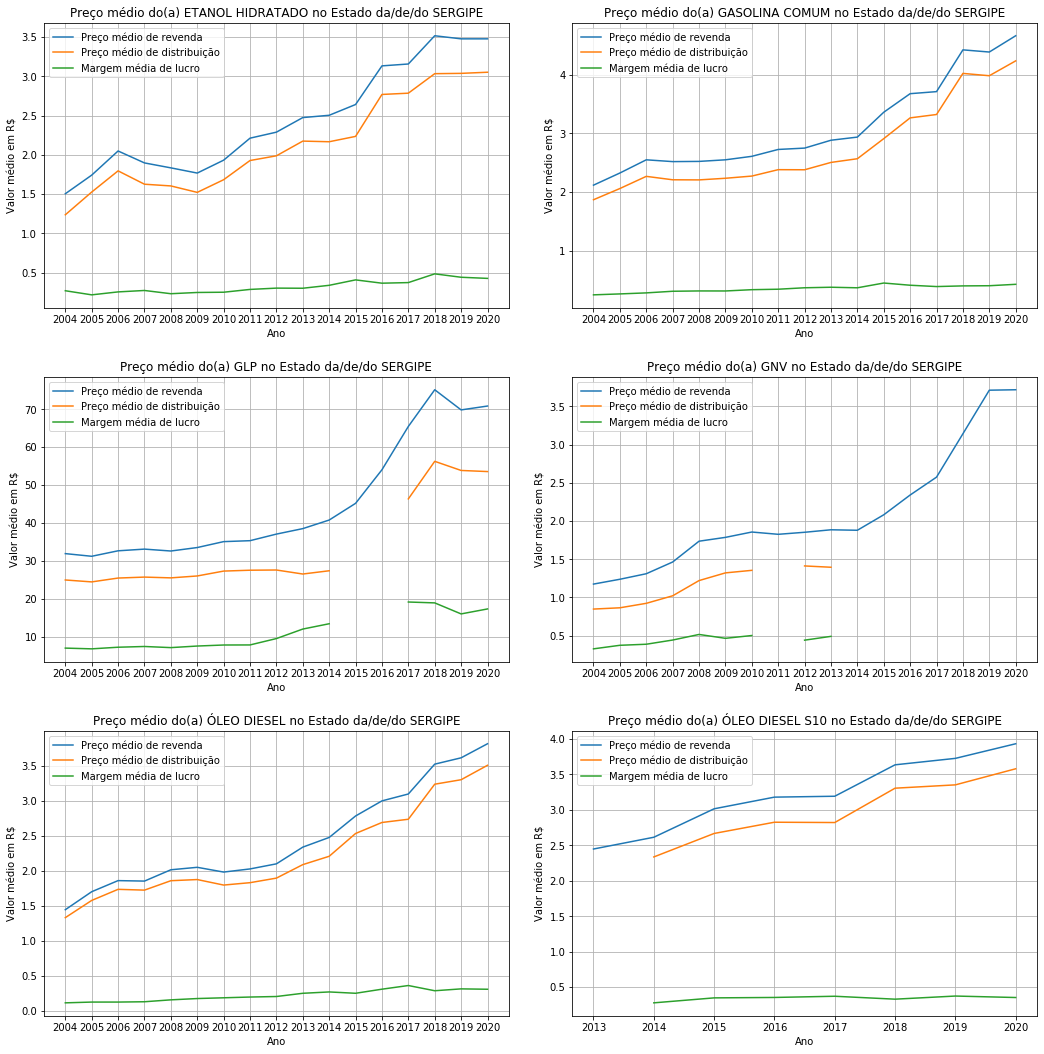

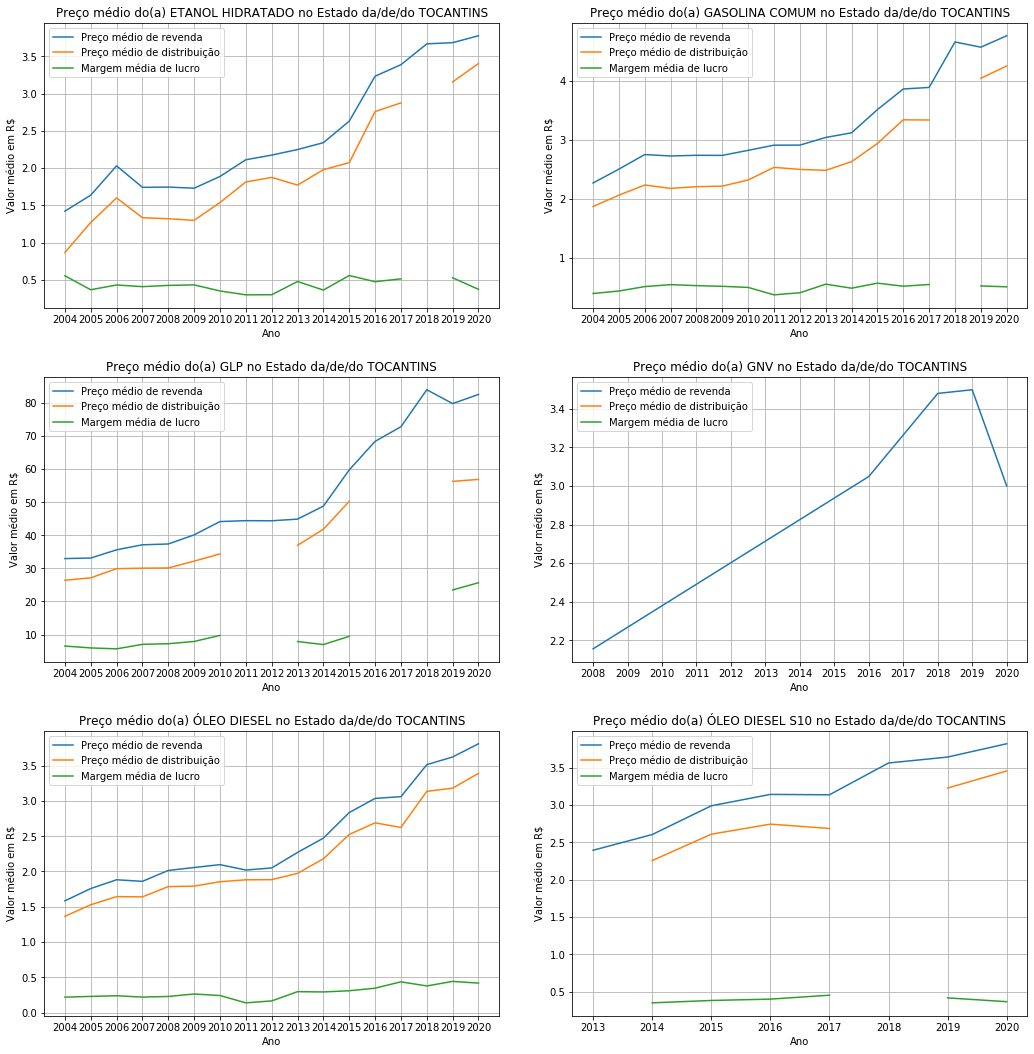

ano     estado           produto  preço_médio_revenda  \
0     2004       ACRE  ETANOL HIDRATADO             1.898515   
1     2004       ACRE    GASOLINA COMUM             2.528636   
2     2004       ACRE               GLP            38.232848   
3     2004       ACRE       ÓLEO DIESEL             1.837515   
4     2004    ALAGOAS  ETANOL HIDRATADO             1.414788   
...    ...        ...               ...                  ...   
2388  2020  TOCANTINS    GASOLINA COMUM             4.763000   
2389  2020  TOCANTINS               GLP            82.510400   
2390  2020  TOCANTINS               GNV             3.000000   
2391  2020  TOCANTINS       ÓLEO DIESEL             3.808800   
2392  2020  TOCANTINS   ÓLEO DIESEL S10             3.820600   

      preço_médio_distribuição  margem_média_revenda  
0                     1.323455              0.575061  
1                     1.974758              0.553879  
2                    32.821758              5.411091  
3                     1.507424              0.330091  
4                     1.181697              0.233091  
...                        ...                   ...  
2388                  4.251600              0.511400  
2389                 56.850200             25.660200  
2390                       NaN                   NaN  
2391                  3.390600              0.418200  
2392                  3.456400              0.364200  

[2393 rows x 6 columns]

In [8]:
def preco_por_estado():
    produtos = dados.produto.sort_values().unique().tolist()

    precos_revenda = dados[['ano', 'estado', 'produto', 'preço_médio_revenda']] \
                          .groupby(['ano', 'estado', 'produto']) \
                          .agg({'preço_médio_revenda' : np.average}) \
                          .reset_index()

    precos_distribuicao = dados[['ano', 'estado', 'produto', 'preço_médio_distribuição']] \
                               .groupby(['ano', 'estado', 'produto']) \
                               .agg({'preço_médio_distribuição' : np.average}) \
                               .reset_index()
   
    margens = dados[['ano', 'estado', 'produto', 'margem_média_revenda']] \
                   .groupby(['ano', 'estado', 'produto']) \
                   .agg({'margem_média_revenda' : np.average}) \
                   .reset_index()
    linhas = 3
    colunas = 2
    
    for e in dados.estado.sort_values().unique().tolist():
        fig, ax = plt.subplots(figsize = (15, 15), nrows = linhas, ncols = colunas)

        p = 0

        for i in range(linhas):
            for j in range(colunas):            
                ax[i, j].grid()
                ax[i, j].set_xlabel('Ano')
                ax[i, j].set_ylabel('Valor médio em R$')

                anos = precos_revenda.loc[(precos_revenda.estado == e) & (precos_revenda.produto == produtos[p]), 'ano'].unique().tolist()        

                revenda = precos_revenda.loc[(precos_revenda.estado == e) & (precos_revenda.produto == produtos[p]), 'preço_médio_revenda'].tolist()

                distrib = precos_distribuicao.loc[(precos_distribuicao.estado == e) & (precos_distribuicao.produto == produtos[p]), 'preço_médio_distribuição'].tolist()

                lucro = margens.loc[(margens.estado == e) & (margens.produto == produtos[p]), 'margem_média_revenda'].tolist()

                #quando não há dados sobre o produto atual (exemplo: GNV em Roraima)
                if(len(anos) == 0):
                    anos = dados.ano.unique().tolist()

                if(len(revenda) == 0):
                    revenda = np.zeros(shape=(len(anos), 1)).tolist()

                if(len(distrib) == 0):
                    distrib = np.zeros(shape=(len(anos), 1)).tolist()

                if(len(lucro) == 0):
                    lucro = np.zeros(shape=(len(anos), 1)).tolist()

                ax[i, j].set_title(f'Preço médio do(a) {produtos[p]} no Estado da/de/do {e}')
                ax[i, j].set_xticks(np.arange(min(anos), max(anos) + 1, 1))

                ax[i, j].plot(anos, revenda, label = 'Preço médio de revenda')
                ax[i, j].plot(anos, distrib, label = 'Preço médio de distribuição')
                ax[i, j].plot(anos, lucro, label = 'Margem média de lucro')

                ax[i, j].legend()

                p += 1
                p %= len(produtos)
    
        plt.tight_layout(pad = 2)
        plt.show()
    
    precos_revenda['preço_médio_distribuição'] = precos_distribuicao.preço_médio_distribuição
    precos_revenda['margem_média_revenda'] = margens.margem_média_revenda
    
    return precos_revenda

preco_por_estado()

C:\Users\davir\Anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\davir\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


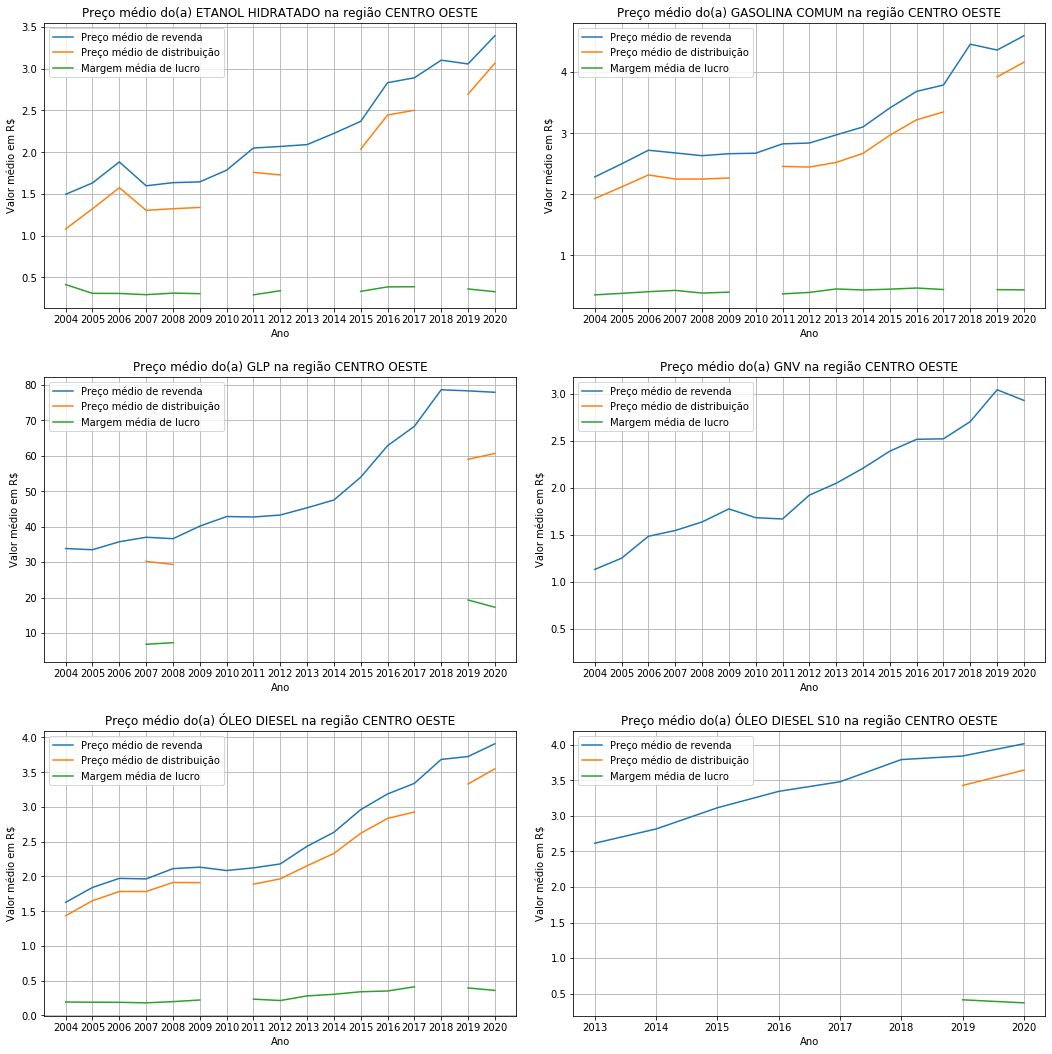

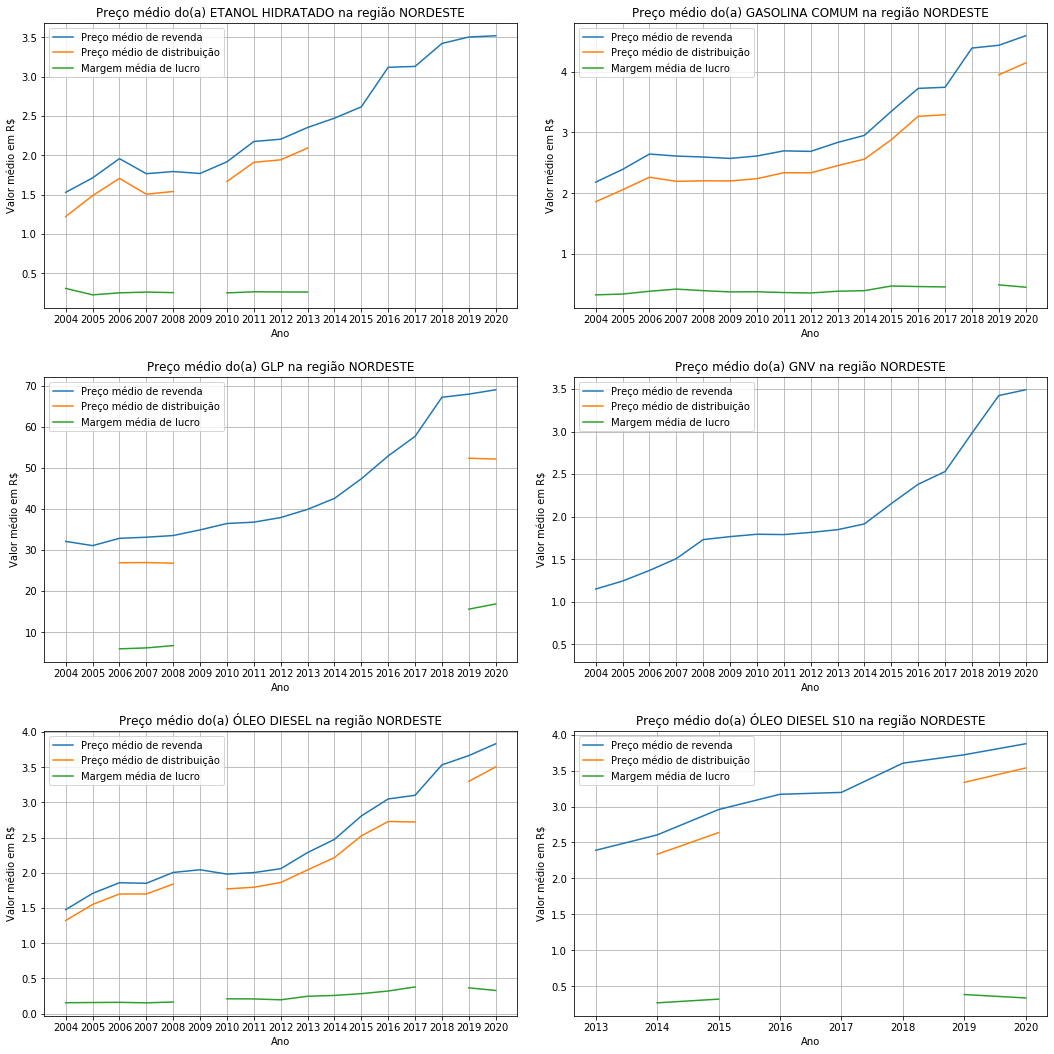

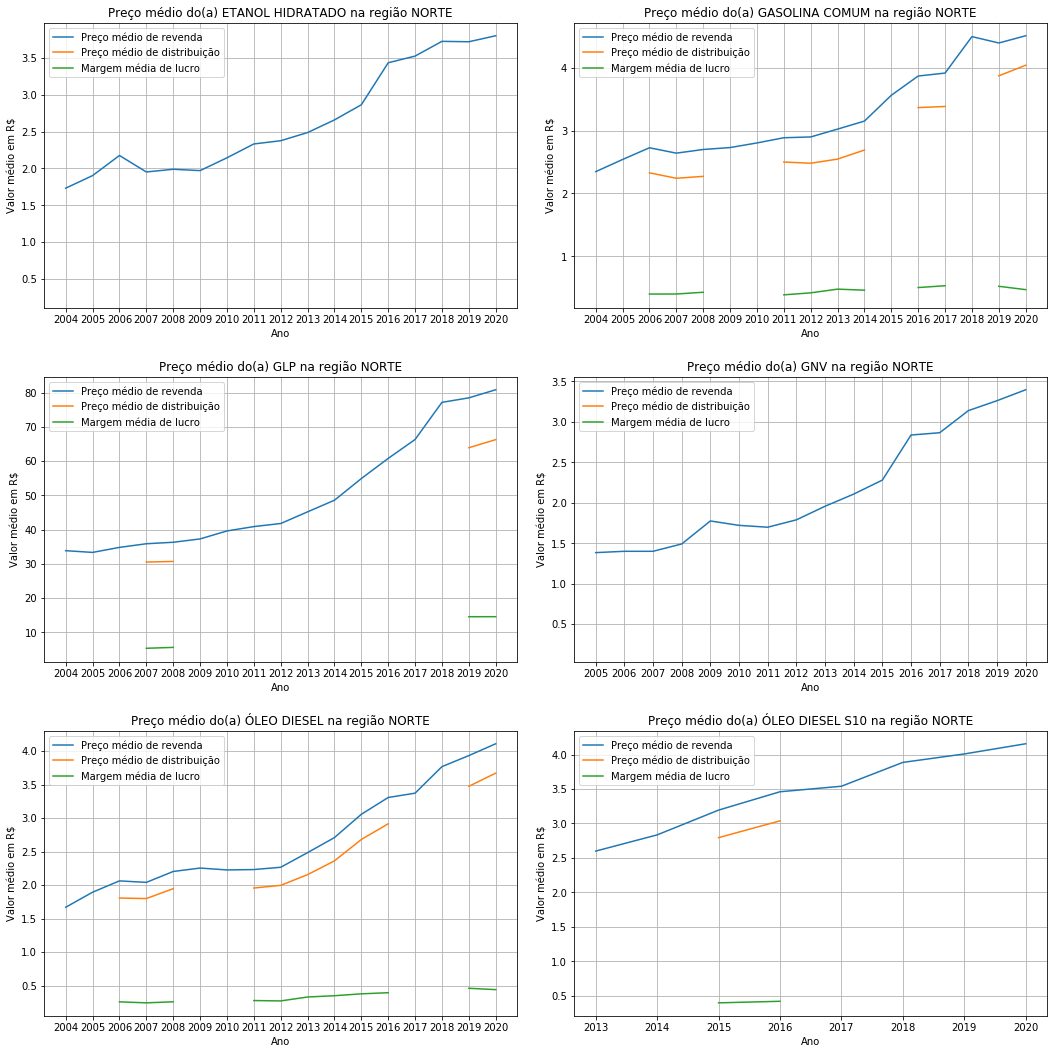

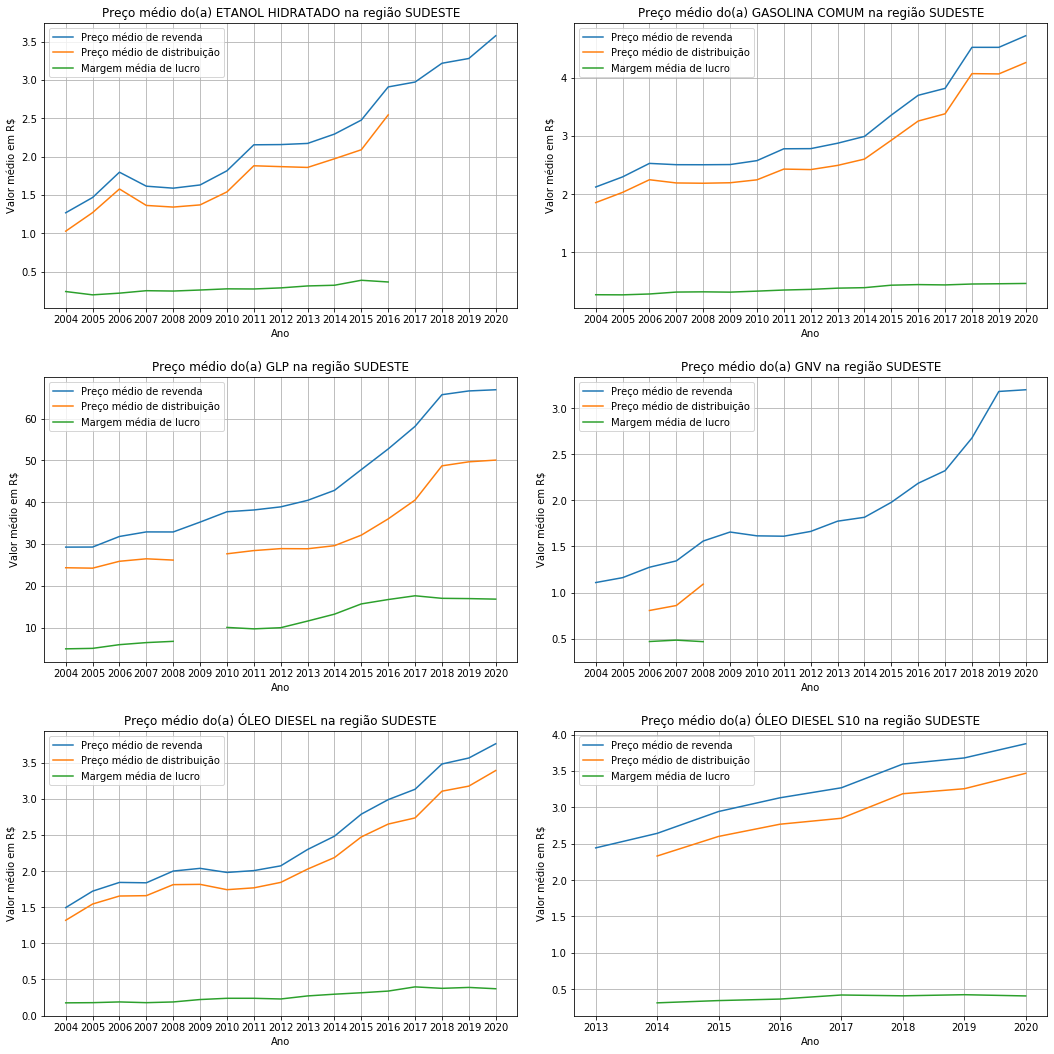

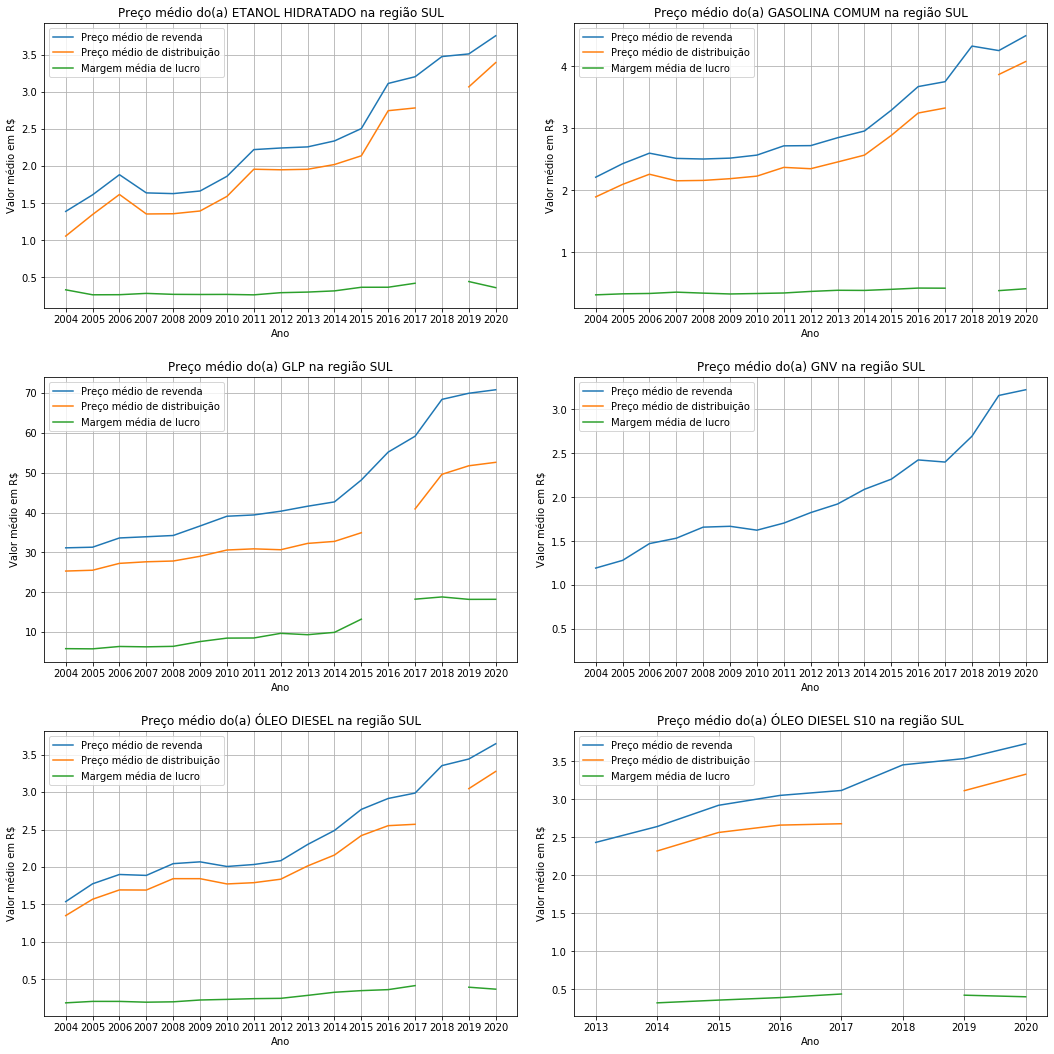

ano        região           produto  preço_médio_revenda  \
0    2004  CENTRO OESTE  ETANOL HIDRATADO             1.495947   
1    2004  CENTRO OESTE    GASOLINA COMUM             2.283545   
2    2004  CENTRO OESTE               GLP            33.810697   
3    2004  CENTRO OESTE               GNV             1.131970   
4    2004  CENTRO OESTE       ÓLEO DIESEL             1.627833   
..    ...           ...               ...                  ...   
459  2020           SUL    GASOLINA COMUM             4.491600   
460  2020           SUL               GLP            70.827733   
461  2020           SUL               GNV             3.224533   
462  2020           SUL       ÓLEO DIESEL             3.644933   
463  2020           SUL   ÓLEO DIESEL S10             3.733533   

     preço_médio_distribuição  margem_média_revenda  
0                    1.081227              0.414720  
1                    1.930061              0.353485  
2                   28.286644              5.524053  
3                    0.844333              0.287636  
4                    1.434856              0.192977  
..                        ...                   ...  
459                  4.076400              0.415200  
460                 52.608067             18.219667  
461                       NaN                   NaN  
462                  3.275667              0.369267  
463                  3.331800              0.401733  

[464 rows x 6 columns]

In [9]:
def preco_por_regiao():
    produtos = dados.produto.sort_values().unique().tolist()

    precos_revenda = dados[['ano', 'região', 'produto', 'preço_médio_revenda']] \
                          .groupby(['ano', 'região', 'produto']) \
                          .agg({'preço_médio_revenda' : np.average}) \
                          .reset_index()

    precos_distribuicao = dados[['ano', 'região', 'produto', 'preço_médio_distribuição']] \
                               .groupby(['ano', 'região', 'produto']) \
                               .agg({'preço_médio_distribuição' : np.average}) \
                               .reset_index()
   
    margens = dados[['ano', 'região', 'produto', 'margem_média_revenda']] \
                   .groupby(['ano', 'região', 'produto']) \
                   .agg({'margem_média_revenda' : np.average}) \
                   .reset_index()
    
    linhas = 3
    colunas = 2
        
    for r in dados.região.sort_values().unique().tolist():
        fig, ax = plt.subplots(figsize = (15, 15), nrows = linhas, ncols = colunas)
    
        p = 0
        
        for i in range(linhas):
            for j in range(colunas):            
                ax[i, j].grid()
                ax[i, j].set_xlabel('Ano')
                ax[i, j].set_ylabel('Valor médio em R$')

                anos = precos_revenda.loc[(precos_revenda.região == r) & (precos_revenda.produto == produtos[p]), 'ano'].unique().tolist()

                revenda = precos_revenda.loc[(precos_revenda.região == r) & (precos_revenda.produto == produtos[p]), 'preço_médio_revenda'].tolist()

                distrib = precos_distribuicao.loc[(precos_revenda.região == r) & (precos_revenda.produto == produtos[p]), 'preço_médio_distribuição'].tolist()

                lucro = margens.loc[(precos_revenda.região == r) & (precos_revenda.produto == produtos[p]), 'margem_média_revenda'].tolist()

                #quando não há dados sobre o produto atual (exemplo: GNV em Roraima)
                if(len(anos) == 0):
                    anos = dados.ano.unique().tolist()

                if(len(revenda) == 0):
                    revenda = np.zeros(shape=(len(anos), 1)).tolist()

                if(len(distrib) == 0):
                    distrib = np.zeros(shape=(len(anos), 1)).tolist()

                if(len(lucro) == 0):
                    lucro = np.zeros(shape=(len(anos), 1)).tolist()

                ax[i, j].set_title(f'Preço médio do(a) {produtos[p]} na região {r}')
                ax[i, j].set_xticks(np.arange(min(anos), max(anos) + 1, 1))

                ax[i, j].plot(anos, revenda, label = 'Preço médio de revenda')
                ax[i, j].plot(anos, distrib, label = 'Preço médio de distribuição')
                ax[i, j].plot(anos, lucro, label = 'Margem média de lucro')

                ax[i, j].legend()

                p += 1
                p %= len(produtos)
    
        plt.tight_layout(pad = 2)
        plt.show()
    
    precos_revenda['preço_médio_distribuição'] = precos_distribuicao.preço_médio_distribuição
    precos_revenda['margem_média_revenda'] = margens.margem_média_revenda
    
    return precos_revenda

preco_por_regiao()

C:\Users\davir\Anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\davir\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


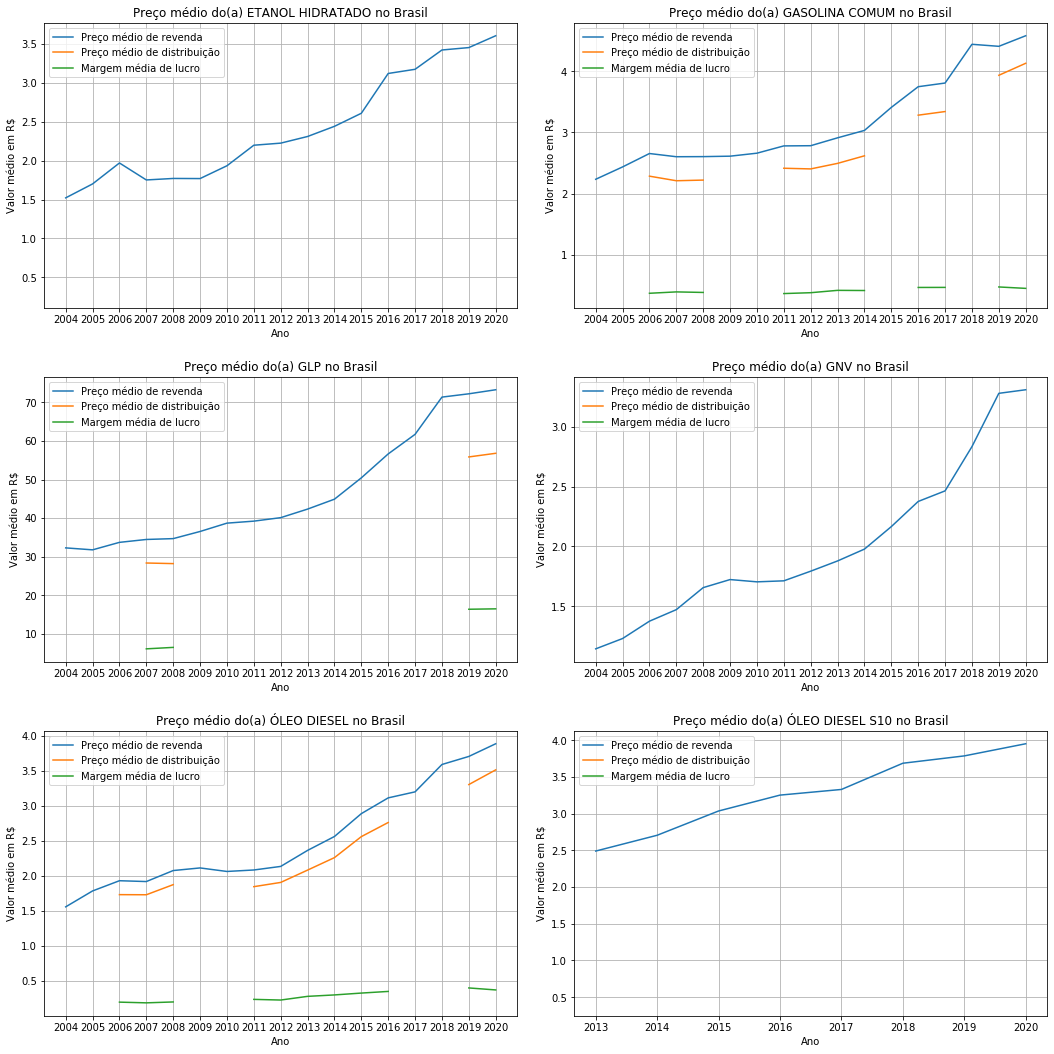

ano           produto  preço_médio_revenda  preço_médio_distribuição  \
0   2004  ETANOL HIDRATADO             1.521847                  1.168218   
1   2004    GASOLINA COMUM             2.234284                  1.889817   
2   2004               GLP            32.274633                       NaN   
3   2004               GNV             1.145797                       NaN   
4   2004       ÓLEO DIESEL             1.558047                  1.365215   
..   ...               ...                  ...                       ...   
88  2020    GASOLINA COMUM             4.580933                  4.130667   
89  2020               GLP            73.268444                 56.796207   
90  2020               GNV             3.307230                       NaN   
91  2020       ÓLEO DIESEL             3.884704                  3.512052   
92  2020   ÓLEO DIESEL S10             3.951978                       NaN   

    margem_média_revenda  
0               0.353630  
1               0.344467  
2                    NaN  
3                    NaN  
4               0.192832  
..                   ...  
88              0.450267  
89             16.472237  
90                   NaN  
91              0.372652  
92                   NaN  

[93 rows x 5 columns]

In [10]:
def preco_por_combustivel():
    produtos = dados.produto.sort_values().unique().tolist()

    precos_revenda = dados[['ano', 'produto', 'preço_médio_revenda']] \
                          .groupby(['ano', 'produto']) \
                          .agg({'preço_médio_revenda' : np.average}) \
                          .reset_index()

    precos_distribuicao = dados[['ano', 'produto', 'preço_médio_distribuição']] \
                               .groupby(['ano', 'produto']) \
                               .agg({'preço_médio_distribuição' : np.average}) \
                               .reset_index()
   
    margens = dados[['ano', 'produto', 'margem_média_revenda']] \
                   .groupby(['ano', 'produto']) \
                   .agg({'margem_média_revenda' : np.average}) \
                   .reset_index()

    linhas = 3
    colunas = 2

    fig, ax = plt.subplots(figsize = (15, 15), nrows = linhas, ncols = colunas)
    
    p = 0
        
    for i in range(linhas):
        for j in range(colunas):            
            ax[i, j].grid()
            ax[i, j].set_xlabel('Ano')
            ax[i, j].set_ylabel('Valor médio em R$')

            anos = precos_revenda.loc[(precos_revenda.produto == produtos[p]), 'ano'].unique().tolist()        
            
            revenda = precos_revenda.loc[(precos_revenda.produto == produtos[p]), 'preço_médio_revenda'].tolist()
            
            distrib = precos_distribuicao.loc[(precos_distribuicao.produto == produtos[p]), 'preço_médio_distribuição'].tolist()
            
            lucro = margens.loc[(margens.produto == produtos[p]), 'margem_média_revenda'].tolist()
            
            #quando não há dados sobre o produto atual (exemplo: GNV em Roraima)
            if(len(anos) == 0):
                anos = dados.ano.unique().tolist()
            
            if(len(revenda) == 0):
                revenda = np.zeros(shape=(len(anos), 1)).tolist()
            
            if(len(distrib) == 0):
                distrib = np.zeros(shape=(len(anos), 1)).tolist()
                
            if(len(lucro) == 0):
                lucro = np.zeros(shape=(len(anos), 1)).tolist()
                            
            ax[i, j].set_title(f'Preço médio do(a) {produtos[p]} no Brasil')
            ax[i, j].set_xticks(np.arange(min(anos), max(anos) + 1, 1))

            ax[i, j].plot(anos, revenda, label = 'Preço médio de revenda')
            ax[i, j].plot(anos, distrib, label = 'Preço médio de distribuição')
            ax[i, j].plot(anos, lucro, label = 'Margem média de lucro')

            ax[i, j].legend()

            p += 1
            p %= len(produtos)
    
    plt.tight_layout(pad = 2)
    plt.show()
    
    precos_revenda['preço_médio_distribuição'] = precos_distribuicao.preço_médio_distribuição
    precos_revenda['margem_média_revenda'] = margens.margem_média_revenda
    
    return precos_revenda

preco_por_combustivel()

### Estados em que houve a maior alta/baixa de preços de combustíveis no período disponível (2004 a 2020)

In [11]:
def calculaVariacao(array):
    return ((max(array) - min(array)) / min(array)) * 100

def variacao_preco_estado():
    dados_variacao = dados[['estado', 'produto', 'preço_médio_revenda']] \
                            .groupby(['estado', 'produto']) \
                            .agg({'preço_médio_revenda' : calculaVariacao}) \
                            .sort_values('preço_médio_revenda')
    
    menor_alta_baixa = 'alta' if (dados_variacao.head(1).preço_médio_revenda.values >= 0) else 'baixa'
    maior_alta_baixa = 'alta' if (dados_variacao.tail(1).preço_médio_revenda.values >= 0) else 'baixa'
    
    menor_preco = dados_variacao.head(1).preço_médio_revenda.values[0]
    maior_preco = dados_variacao.tail(1).preço_médio_revenda.values[0]
    
    menor_estado = dados_variacao.head(1).index.values[0][0]
    maior_estado = dados_variacao.tail(1).index.values[0][0]
    
    menor_produto = dados_variacao.head(1).index.values[0][1]
    maior_produto = dados_variacao.tail(1).index.values[0][1]

    print(f'Estado com a menor {menor_alta_baixa} de preço entre {min(anos)} e {max(anos)}: {menor_estado} ({menor_produto}, {menor_preco:.2f}%)\n' +
          f'Estado com a maior {maior_alta_baixa} de preço entre {min(anos)} e {max(anos)}: {maior_estado} ({maior_produto}, {maior_preco:.2f}%)')
    
    return dados_variacao

variacao_preco_estado()

Estado com a menor alta de preço entre 2004 e 2020: ACRE (GNV, 3.07%)
Estado com a maior alta de preço entre 2004 e 2020: SAO PAULO (ETANOL HIDRATADO, 301.17%)


preço_médio_revenda
estado              produto                              
ACRE                GNV                          3.070175
RORAIMA             ÓLEO DIESEL S10             60.967742
RONDONIA            ÓLEO DIESEL S10             61.650869
MATO GROSSO         ÓLEO DIESEL S10             63.429021
TOCANTINS           GNV                         65.829384
...                                                   ...
PARANA              ETANOL HIDRATADO           250.976139
RIO GRANDE DO SUL   ETANOL HIDRATADO           257.540984
RIO GRANDE DO NORTE GNV                        277.538462
RIO DE JANEIRO      ETANOL HIDRATADO           296.794872
SAO PAULO           ETANOL HIDRATADO           301.174935

[161 rows x 1 columns]

### Combustíveis que sofreram os maiores aumentos/as maiores baixas de preço no período disponível (2004 a 2020)

In [12]:
def variacao_preco_produto():
    dados_variacao = dados[['estado', 'produto', 'preço_médio_revenda']] \
                            .groupby(['produto']) \
                            .agg({'preço_médio_revenda' : calculaVariacao}) \
                            .sort_values('preço_médio_revenda')
    
    menor_alta_baixa = 'alta' if (dados_variacao.head(1).preço_médio_revenda.values >= 0) else 'baixa'
    maior_alta_baixa = 'alta' if (dados_variacao.tail(1).preço_médio_revenda.values >= 0) else 'baixa'
    
    menor_preco = dados_variacao.head(1).preço_médio_revenda.values[0]
    maior_preco = dados_variacao.tail(1).preço_médio_revenda.values[0]
    
    menor_produto = dados_variacao.head(1).index.values[0]
    maior_produto = dados_variacao.tail(1).index.values[0]

    print(f'Produto com a menor {menor_alta_baixa} de preço entre {min(anos)} e {max(anos)}: {menor_produto} ({menor_preco:.2f}%)\n' +
          f'Produto com a maior {maior_alta_baixa} de preço entre {min(anos)} e {max(anos)}: {maior_produto} ({maior_preco:.2f}%)')
    
    return dados_variacao

variacao_preco_produto()

Produto com a menor alta de preço entre 2004 e 2020: ÓLEO DIESEL S10 (129.01%)
Produto com a maior alta de preço entre 2004 e 2020: ETANOL HIDRATADO (482.11%)


preço_médio_revenda
produto                              
ÓLEO DIESEL S10            129.014085
GASOLINA COMUM             184.004237
GLP                        254.517234
ÓLEO DIESEL                267.022087
GNV                        390.153846
ETANOL HIDRATADO           482.114883

### Estado com o maior número de postos de combustíveis

In [13]:
def estado_mais_postos():
    estado = dados[['estado', 'número_de_postos_pesquisados']] \
                .sort_values('número_de_postos_pesquisados')\
                .tail(1)\
                .iat[0, 0]
    
    print(f'Estado com o maior número de postos de combustíveis: {estado}')

estado_mais_postos()

Estado com o maior número de postos de combustíveis: SAO PAULO


### Estado com a maior diferença entre o preço médio de distribuição e o preço médio de revenda

In [14]:
def estado_maior_diferenca_distrib_revenda():
    precos = dados[['estado', 'produto', 'preço_médio_distribuição', 'preço_médio_revenda']].dropna()
    precos['diferenca'] = precos.preço_médio_revenda - precos.preço_médio_distribuição
    precos = precos.groupby(['estado', 'produto']).agg({'diferenca' : np.average})
    precos.sort_values('diferenca', inplace = True)
    
    resposta = precos.tail(1)
    estado = resposta.index.values[0][0]
    produto = resposta.index.values[0][1]
    diferenca = resposta.iat[0, 0]
    
    print(f'{estado} é o estado com a maior diferença entre o preço médio de distribuição e o preço médio de ' +
          f'revenda no período entre {min(anos)} e {max(anos)}: {produto}, R$ {diferenca:.2f} (margem de lucro)')
    
    return precos

estado_maior_diferenca_distrib_revenda()

MATO GROSSO é o estado com a maior diferença entre o preço médio de distribuição e o preço médio de revenda no período entre 2004 e 2020: GLP, R$ 12.05 (margem de lucro)


C:\Users\davir\Anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\davir\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


diferenca
estado            produto               
PIAUI             GNV           0.148500
SERGIPE           ÓLEO DIESEL   0.218555
PARAIBA           ÓLEO DIESEL   0.220758
MARANHAO          ÓLEO DIESEL   0.221558
PERNAMBUCO        ÓLEO DIESEL   0.234230
...                                  ...
AMAPA             GLP          11.494491
SAO PAULO         GLP          11.497377
PARA              GLP          11.528247
RIO GRANDE DO SUL GLP          11.583772
MATO GROSSO       GLP          12.050116

[159 rows x 1 columns]

### Estado com o maior/o menor preço de revenda de cada combustível

In [15]:
def estado_maior_revenda_combustivel():    
    produtos = dados.produto.unique().tolist()
    
    revenda_p = dados[['produto', 'estado', 'preço_médio_revenda']] \
                    .groupby(['produto', 'estado']) \
                    .agg({'preço_médio_revenda' : np.average}) \
                    .sort_values('preço_médio_revenda')
    
    for p in produtos:
        idx = pd.IndexSlice
        produto_atual = revenda_p.loc[idx[p, :], :]
        
        menor = produto_atual.head(1).iat[0, 0]
        maior = produto_atual.tail(1).iat[0, 0]
                
        estado_menor = produto_atual.head(1).index.values[0][1]
        estado_maior = produto_atual.tail(1).index.values[0][1]
        
        print(f'{p} -> mais caro em/na/no {estado_maior} (R$ {maior:.2f}); ' +
              f'mais barato em/na/no {estado_menor} (R$ {menor:.2f})')
    
    return revenda_p

estado_maior_revenda_combustivel()

ETANOL HIDRATADO -> mais caro em/na/no ACRE (R$ 2.73); mais barato em/na/no SAO PAULO (R$ 1.84)
GASOLINA COMUM -> mais caro em/na/no ACRE (R$ 3.47); mais barato em/na/no SAO PAULO (R$ 2.90)
GLP -> mais caro em/na/no MATO GROSSO (R$ 57.04); mais barato em/na/no PERNAMBUCO (R$ 41.12)
GNV -> mais caro em/na/no DISTRITO FEDERAL (R$ 3.01); mais barato em/na/no PIAUI (R$ 1.60)
ÓLEO DIESEL -> mais caro em/na/no ACRE (R$ 2.95); mais barato em/na/no PARANA (R$ 2.32)
ÓLEO DIESEL S10 -> mais caro em/na/no AMAPA (R$ 3.75); mais barato em/na/no PARANA (R$ 2.95)


C:\Users\davir\Anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\davir\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


preço_médio_revenda
produto          estado                             
GNV              PIAUI                      1.596111
                 SAO PAULO                  1.681645
                 RIO DE JANEIRO             1.778930
ETANOL HIDRATADO SAO PAULO                  1.838371
GNV              PERNAMBUCO                 1.854995
...                                              ...
GLP              RORAIMA                   49.960235
                 AMAPA                     50.028194
                 ACRE                      50.672458
                 TOCANTINS                 51.108903
                 MATO GROSSO               57.041837

[161 rows x 1 columns]

### Produto mais barato/caro por estado

In [16]:
def produtos_preco_estado():    
    estados = dados.estado.sort_values().unique().tolist()
    
    precos = dados[['produto', 'estado', 'preço_médio_revenda']] \
                .groupby(['estado', 'produto']) \
                .agg({'preço_médio_revenda' : np.average}) \
                .sort_values('preço_médio_revenda')

    for e in estados:
        idx = pd.IndexSlice
        estado_atual = precos.loc[idx[e, :], :]
        
        menor = estado_atual.head(1).iat[0, 0]
        maior = estado_atual.tail(1).iat[0, 0]

        produto_barato = estado_atual.head(1).index.values[0][1]
        produto_caro = estado_atual.tail(1).index.values[0][1]
                
        print(f'{e} -> {produto_barato} é o combustível mais barato (R$ {menor:.2f}); ' +
              f'{produto_caro} é o combustível mais caro (R$ {maior:.2f})')
    
    return precos
        
produtos_preco_estado()

C:\Users\davir\Anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\davir\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ACRE -> GNV é o combustível mais barato (R$ 2.32); GLP é o combustível mais caro (R$ 50.67)
ALAGOAS -> GNV é o combustível mais barato (R$ 1.99); GLP é o combustível mais caro (R$ 41.98)
AMAPA -> ETANOL HIDRATADO é o combustível mais barato (R$ 2.51); GLP é o combustível mais caro (R$ 50.03)
AMAZONAS -> GNV é o combustível mais barato (R$ 2.00); GLP é o combustível mais caro (R$ 42.28)
BAHIA -> GNV é o combustível mais barato (R$ 1.90); GLP é o combustível mais caro (R$ 41.17)
CEARA -> GNV é o combustível mais barato (R$ 2.06); GLP é o combustível mais caro (R$ 45.53)
DISTRITO FEDERAL -> ETANOL HIDRATADO é o combustível mais barato (R$ 2.37); GLP é o combustível mais caro (R$ 46.09)
ESPIRITO SANTO -> GNV é o combustível mais barato (R$ 1.91); GLP é o combustível mais caro (R$ 41.76)
GOIAS -> ETANOL HIDRATADO é o combustível mais barato (R$ 2.05); GLP é o combustível mais caro (R$ 44.57)
MARANHAO -> ÓLEO DIESEL é o combustível mais barato (R$ 2.39); GLP é o combustível mais caro (R$ 45.

preço_médio_revenda
estado         produto                              
PIAUI          GNV                          1.596111
SAO PAULO      GNV                          1.681645
RIO DE JANEIRO GNV                          1.778930
SAO PAULO      ETANOL HIDRATADO             1.838371
PERNAMBUCO     GNV                          1.854995
...                                              ...
RORAIMA        GLP                         49.960235
AMAPA          GLP                         50.028194
ACRE           GLP                         50.672458
TOCANTINS      GLP                         51.108903
MATO GROSSO    GLP                         57.041837

[161 rows x 1 columns]

### Produto mais barato/caro por região

In [17]:
def produtos_preco_regiao():    
    regioes = dados.região.sort_values().unique().tolist()
    
    precos = dados[['produto', 'região', 'preço_médio_revenda']] \
                  .groupby(['região', 'produto']) \
                  .agg({'preço_médio_revenda' : np.average}) \
                  .sort_values('preço_médio_revenda')
    
    for r in regioes:
        idx = pd.IndexSlice
        regiao_atual = precos.loc[idx[r, :], :]
        
        menor = regiao_atual.head(1).iloc[0, 0]
        maior = regiao_atual.tail(1).iloc[0, 0]
        
        produto_barato = regiao_atual.head(1).index.values[0][1]
        produto_caro = regiao_atual.tail(1).index.values[0][1]
                
        print(f'{r} -> {produto_barato} é o combustível mais barato (R$ {menor:.2f}); ' +
              f'{produto_caro} é o combustível mais caro (R$ {maior:.2f})')
    
    return precos
        
produtos_preco_regiao()

C:\Users\davir\Anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\davir\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


CENTRO OESTE -> GNV é o combustível mais barato (R$ 2.03); GLP é o combustível mais caro (R$ 49.31)
NORDESTE -> GNV é o combustível mais barato (R$ 1.98); GLP é o combustível mais caro (R$ 43.20)
NORTE -> GNV é o combustível mais barato (R$ 2.06); GLP é o combustível mais caro (R$ 48.38)
SUDESTE -> GNV é o combustível mais barato (R$ 1.83); GLP é o combustível mais caro (R$ 43.01)
SUL -> GNV é o combustível mais barato (R$ 1.96); GLP é o combustível mais caro (R$ 44.55)


preço_médio_revenda
região       produto                              
SUDESTE      GNV                          1.834406
SUL          GNV                          1.956433
NORDESTE     GNV                          1.983237
CENTRO OESTE GNV                          2.031948
NORTE        GNV                          2.060937
CENTRO OESTE ETANOL HIDRATADO             2.172719
SUDESTE      ETANOL HIDRATADO             2.208909
SUL          ETANOL HIDRATADO             2.317042
NORDESTE     ETANOL HIDRATADO             2.367544
SUL          ÓLEO DIESEL                  2.377403
SUDESTE      ÓLEO DIESEL                  2.388978
NORDESTE     ÓLEO DIESEL                  2.399816
CENTRO OESTE ÓLEO DIESEL                  2.530961
NORTE        ETANOL HIDRATADO             2.573080
             ÓLEO DIESEL                  2.624384
SUL          GASOLINA COMUM               3.022514
             ÓLEO DIESEL S10              3.033732
NORDESTE     GASOLINA COMUM               3.058550
SUDESTE      GASOLINA COMUM               3.060084
NORDESTE     ÓLEO DIESEL S10              3.103633
SUDESTE      ÓLEO DIESEL S10              3.112764
CENTRO OESTE GASOLINA COMUM               3.128621
NORTE        GASOLINA COMUM               3.197744
CENTRO OESTE ÓLEO DIESEL S10              3.296232
NORTE        ÓLEO DIESEL S10              3.373824
SUDESTE      GLP                         43.009644
NORDESTE     GLP                         43.202176
SUL          GLP                         44.550067
NORTE        GLP                         48.375014
CENTRO OESTE GLP                         49.311794

### Produto mais barato/caro no país

In [18]:
def produtos_preco_pais():
    precos = dados[['produto', 'preço_médio_revenda']] \
                  .groupby('produto') \
                  .agg({'preço_médio_revenda' : np.average}) \
                  .sort_values('preço_médio_revenda')

    menor = precos.head(1).iloc[0, 0]
    maior = precos.tail(1).iloc[0, 0]
    
    produto_barato = precos.head(1).index.values[0]
    produto_caro = precos.tail(1).index.values[0]

    print(f'{produto_barato} é o combustível mais barato (R$ {menor:.2f})\n' +
          f'{produto_caro} é o combustível mais caro (R$ {maior:.2f})')
    
    return precos
        
produtos_preco_pais()

GNV é o combustível mais barato (R$ 1.95)
GLP é o combustível mais caro (R$ 45.57)


C:\Users\davir\Anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\davir\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


preço_médio_revenda
produto                              
GNV                          1.950946
ETANOL HIDRATADO             2.361831
ÓLEO DIESEL                  2.473364
GASOLINA COMUM               3.101237
ÓLEO DIESEL S10              3.195674
GLP                         45.569562

## Visualização Geográfica dos Dados

In [19]:
#importando bibliotecas para dados geográficos
import geopandas as gpd
import descartes
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
sns.set_style('whitegrid')

geo_data = gpd.read_file('Dados IBGE', encoding = 'utf-8')

In [20]:
geo_data

NM_ESTADO     NM_REGIAO CD_GEOCUF  \
0              RONDÔNIA         NORTE        11   
1                  ACRE         NORTE        12   
2              AMAZONAS         NORTE        13   
3               RORAIMA         NORTE        14   
4                  PARÁ         NORTE        15   
5                 AMAPÁ         NORTE        16   
6             TOCANTINS         NORTE        17   
7              MARANHÃO      NORDESTE        21   
8                 PIAUÍ      NORDESTE        22   
9                 CEARÁ      NORDESTE        23   
10  RIO GRANDE DO NORTE      NORDESTE        24   
11              PARAÍBA      NORDESTE        25   
12           PERNAMBUCO      NORDESTE        26   
13              ALAGOAS      NORDESTE        27   
14              SERGIPE      NORDESTE        28   
15                BAHIA      NORDESTE        29   
16         MINAS GERAIS       SUDESTE        31   
17       ESPÍRITO SANTO       SUDESTE        32   
18       RIO DE JANEIRO       SUDESTE        33   
19            SÃO PAULO       SUDESTE        35   
20               PARANÁ           SUL        41   
21       SANTA CATARINA           SUL        42   
22   MATO GROSSO DO SUL  CENTRO-OESTE        50   
23          MATO GROSSO  CENTRO-OESTE        51   
24                GOIÁS  CENTRO-OESTE        52   
25     DISTRITO FEDERAL  CENTRO-OESTE        53   
26    RIO GRANDE DO SUL           SUL        43   

                                             geometry  
0   POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...  
1   POLYGON ((-73.18253 -7.33550, -73.05413 -7.381...  
2   POLYGON ((-67.32609 2.02971, -67.31682 2.00125...  
3   POLYGON ((-60.20051 5.26434, -60.19828 5.26045...  
4   MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...  
5   MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1...  
6   POLYGON ((-48.35878 -5.17008, -48.35617 -5.171...  
7   MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ...  
8   POLYGON ((-41.74605 -2.80350, -41.74241 -2.805...  
9   POLYGON ((-40.49717 -2.78451, -40.49173 -2.788...  
10  POLYGON ((-37.25329 -4.83156, -37.25326 -4.831...  
11  MULTIPOLYGON (((-34.85946 -6.98417, -34.85827 ...  
12  MULTIPOLYGON (((-37.23361 -7.27440, -37.23284 ...  
13  POLYGON ((-35.46753 -8.81744, -35.46659 -8.817...  
14  POLYGON ((-37.99089 -9.52623, -37.98933 -9.527...  
15  MULTIPOLYGON (((-38.65484 -18.04242, -38.65819...  
16  POLYGON ((-44.20984 -14.24460, -44.20912 -14.2...  
17  MULTIPOLYGON (((-40.39595 -20.62216, -40.39617...  
18  MULTIPOLYGON (((-44.71892 -23.35908, -44.71956...  
19  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...  
20  POLYGON ((-52.05188 -22.53933, -52.04607 -22.5...  
21  MULTIPOLYGON (((-48.82145 -28.61110, -48.82159...  
22  POLYGON ((-56.10370 -17.17354, -56.10209 -17.1...  
23  POLYGON ((-57.93439 -7.65677, -57.93044 -7.657...  
24  POLYGON ((-50.16015 -12.42007, -50.15836 -12.4...  
25  POLYGON ((-48.20054 -15.50026, -48.14051 -15.5...  
26  POLYGON ((-53.03183 -27.15947, -53.02991 -27.1...

In [21]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   NM_ESTADO  27 non-null     object  
 1   NM_REGIAO  27 non-null     object  
 2   CD_GEOCUF  27 non-null     object  
 3   geometry   27 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 992.0+ bytes


In [22]:
#adequação dos nomes dos estados e das regiões ao dataset principal

dic_estados = {'RONDÔNIA' : 'RONDONIA', 'PARÁ' : 'PARA', 'AMAPÁ' : 'AMAPA', 'MARANHÃO' : 'MARANHAO',
               'PIAUÍ' : 'PIAUI', 'CEARÁ' : 'CEARA', 'PARAÍBA' : 'PARAIBA', 'ESPÍRITO SANTO' : 'ESPIRITO SANTO',
               'SÃO PAULO' : 'SAO PAULO', 'PARANÁ' : 'PARANA', 'GOIÁS' : 'GOIAS', 'ACRE' : 'ACRE',
               'AMAZONAS' : 'AMAZONAS', 'RORAIMA' : 'RORAIMA', 'TOCANTINS' : 'TOCANTINS', 
               'RIO GRANDE DO NORTE' : 'RIO GRANDE DO NORTE', 'PERNAMBUCO' : 'PERNAMBUCO', 
               'ALAGOAS' : 'ALAGOAS', 'SERGIPE' : 'SERGIPE', 'BAHIA' : 'BAHIA', 'MINAS GERAIS' : 'MINAS GERAIS',
               'RIO DE JANEIRO' : 'RIO DE JANEIRO', 'SANTA CATARINA' : 'SANTA CATARINA', 
               'MATO GROSSO DO SUL' : 'MATO GROSSO DO SUL', 'MATO GROSSO' : 'MATO GROSSO', 
               'DISTRITO FEDERAL' : 'DISTRITO FEDERAL', 'RIO GRANDE DO SUL' : 'RIO GRANDE DO SUL'}

geo_data['NM_ESTADO'] = geo_data.NM_ESTADO.map(dic_estados)

geo_data["NM_REGIAO"] = geo_data.NM_REGIAO.str.replace('-', ' ')

geo_data

NM_ESTADO     NM_REGIAO CD_GEOCUF  \
0              RONDONIA         NORTE        11   
1                  ACRE         NORTE        12   
2              AMAZONAS         NORTE        13   
3               RORAIMA         NORTE        14   
4                  PARA         NORTE        15   
5                 AMAPA         NORTE        16   
6             TOCANTINS         NORTE        17   
7              MARANHAO      NORDESTE        21   
8                 PIAUI      NORDESTE        22   
9                 CEARA      NORDESTE        23   
10  RIO GRANDE DO NORTE      NORDESTE        24   
11              PARAIBA      NORDESTE        25   
12           PERNAMBUCO      NORDESTE        26   
13              ALAGOAS      NORDESTE        27   
14              SERGIPE      NORDESTE        28   
15                BAHIA      NORDESTE        29   
16         MINAS GERAIS       SUDESTE        31   
17       ESPIRITO SANTO       SUDESTE        32   
18       RIO DE JANEIRO       SUDESTE        33   
19            SAO PAULO       SUDESTE        35   
20               PARANA           SUL        41   
21       SANTA CATARINA           SUL        42   
22   MATO GROSSO DO SUL  CENTRO OESTE        50   
23          MATO GROSSO  CENTRO OESTE        51   
24                GOIAS  CENTRO OESTE        52   
25     DISTRITO FEDERAL  CENTRO OESTE        53   
26    RIO GRANDE DO SUL           SUL        43   

                                             geometry  
0   POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...  
1   POLYGON ((-73.18253 -7.33550, -73.05413 -7.381...  
2   POLYGON ((-67.32609 2.02971, -67.31682 2.00125...  
3   POLYGON ((-60.20051 5.26434, -60.19828 5.26045...  
4   MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...  
5   MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1...  
6   POLYGON ((-48.35878 -5.17008, -48.35617 -5.171...  
7   MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ...  
8   POLYGON ((-41.74605 -2.80350, -41.74241 -2.805...  
9   POLYGON ((-40.49717 -2.78451, -40.49173 -2.788...  
10  POLYGON ((-37.25329 -4.83156, -37.25326 -4.831...  
11  MULTIPOLYGON (((-34.85946 -6.98417, -34.85827 ...  
12  MULTIPOLYGON (((-37.23361 -7.27440, -37.23284 ...  
13  POLYGON ((-35.46753 -8.81744, -35.46659 -8.817...  
14  POLYGON ((-37.99089 -9.52623, -37.98933 -9.527...  
15  MULTIPOLYGON (((-38.65484 -18.04242, -38.65819...  
16  POLYGON ((-44.20984 -14.24460, -44.20912 -14.2...  
17  MULTIPOLYGON (((-40.39595 -20.62216, -40.39617...  
18  MULTIPOLYGON (((-44.71892 -23.35908, -44.71956...  
19  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...  
20  POLYGON ((-52.05188 -22.53933, -52.04607 -22.5...  
21  MULTIPOLYGON (((-48.82145 -28.61110, -48.82159...  
22  POLYGON ((-56.10370 -17.17354, -56.10209 -17.1...  
23  POLYGON ((-57.93439 -7.65677, -57.93044 -7.657...  
24  POLYGON ((-50.16015 -12.42007, -50.15836 -12.4...  
25  POLYGON ((-48.20054 -15.50026, -48.14051 -15.5...  
26  POLYGON ((-53.03183 -27.15947, -53.02991 -27.1...

In [23]:
#Coordinate Reference System (CRS) : posiciona as coordenadas do IBGE em relação ao globo terrestre
geo_data.crs = {"init": "epsg:4326"}

geo_data.dissolve(by = 'NM_REGIAO')

geometry  \
NM_REGIAO                                                         
CENTRO OESTE  POLYGON ((-50.51107 -12.86077, -50.51034 -12.8...   
NORDESTE      MULTIPOLYGON (((-38.65134 -17.94651, -38.65296...   
NORTE         MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...   
SUDESTE       MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...   
SUL           MULTIPOLYGON (((-48.46837 -27.70455, -48.46868...   

                       NM_ESTADO CD_GEOCUF  
NM_REGIAO                                   
CENTRO OESTE  MATO GROSSO DO SUL        50  
NORDESTE                MARANHAO        21  
NORTE                   RONDONIA        11  
SUDESTE             MINAS GERAIS        31  
SUL                       PARANA        41

In [24]:
#obter dados geográficos por região
geo_data_regioes = geo_data.dissolve(by = 'NM_REGIAO').reset_index()[['NM_REGIAO', 'geometry']]
geo_data_regioes.rename(columns = {'NM_REGIAO' : 'região'}, inplace = True)

geo_data_regioes

região                                           geometry
0  CENTRO OESTE  POLYGON ((-50.51107 -12.86077, -50.51034 -12.8...
1      NORDESTE  MULTIPOLYGON (((-38.65134 -17.94651, -38.65296...
2         NORTE  MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...
3       SUDESTE  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...
4           SUL  MULTIPOLYGON (((-48.46837 -27.70455, -48.46868...

### Variação percentual dos preços médios de revenda dos combustíveis por região no período entre 2004 e 2020

In [25]:
#calcular a variação percentual por região/produto
variacao_regiao = dados[['região', 'estado', 'produto', 'preço_médio_revenda']] \
                        .groupby(['região', 'produto']) \
                        .agg({'preço_médio_revenda' : calculaVariacao})

variacao_regiao.reset_index(inplace = True)
variacao_regiao.rename(columns = {'preço_médio_revenda' : 'variação'}, inplace = True)

variacao_regiao

região           produto    variação
0   CENTRO OESTE  ETANOL HIDRATADO  244.148021
1   CENTRO OESTE    GASOLINA COMUM  156.353306
2   CENTRO OESTE               GLP  245.097426
3   CENTRO OESTE               GNV  272.835005
4   CENTRO OESTE       ÓLEO DIESEL  190.034843
5   CENTRO OESTE   ÓLEO DIESEL S10   89.873418
6       NORDESTE  ETANOL HIDRATADO  232.514818
7       NORDESTE    GASOLINA COMUM  154.027707
8       NORDESTE               GLP  180.713505
9       NORDESTE               GNV  390.153846
10      NORDESTE       ÓLEO DIESEL  213.328256
11      NORDESTE   ÓLEO DIESEL S10   91.032864
12         NORTE  ETANOL HIDRATADO  263.703100
13         NORTE    GASOLINA COMUM  168.771930
14         NORTE               GLP  210.724204
15         NORTE               GNV  277.276456
16         NORTE       ÓLEO DIESEL  232.344828
17         NORTE   ÓLEO DIESEL S10  124.585635
18       SUDESTE  ETANOL HIDRATADO  465.665796
19       SUDESTE    GASOLINA COMUM  171.133475
20       SUDESTE               GLP  182.566189
21       SUDESTE               GNV  260.843373
22       SUDESTE       ÓLEO DIESEL  194.542773
23       SUDESTE   ÓLEO DIESEL S10   87.155963
24           SUL  ETANOL HIDRATADO  373.101952
25           SUL    GASOLINA COMUM  152.575217
26           SUL               GLP  144.864130
27           SUL               GNV  212.157534
28           SUL       ÓLEO DIESEL  176.564774
29           SUL   ÓLEO DIESEL S10   78.271028

In [26]:
#merge com geo_data_regioes
geo_variacao_regioes = geo_data_regioes.merge(variacao_regiao, on = 'região')

geo_variacao_regioes

região                                           geometry  \
0   CENTRO OESTE  POLYGON ((-50.51107 -12.86077, -50.51034 -12.8...   
1   CENTRO OESTE  POLYGON ((-50.51107 -12.86077, -50.51034 -12.8...   
2   CENTRO OESTE  POLYGON ((-50.51107 -12.86077, -50.51034 -12.8...   
3   CENTRO OESTE  POLYGON ((-50.51107 -12.86077, -50.51034 -12.8...   
4   CENTRO OESTE  POLYGON ((-50.51107 -12.86077, -50.51034 -12.8...   
5   CENTRO OESTE  POLYGON ((-50.51107 -12.86077, -50.51034 -12.8...   
6       NORDESTE  MULTIPOLYGON (((-38.65134 -17.94651, -38.65296...   
7       NORDESTE  MULTIPOLYGON (((-38.65134 -17.94651, -38.65296...   
8       NORDESTE  MULTIPOLYGON (((-38.65134 -17.94651, -38.65296...   
9       NORDESTE  MULTIPOLYGON (((-38.65134 -17.94651, -38.65296...   
10      NORDESTE  MULTIPOLYGON (((-38.65134 -17.94651, -38.65296...   
11      NORDESTE  MULTIPOLYGON (((-38.65134 -17.94651, -38.65296...   
12         NORTE  MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...   
13         NORTE  MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...   
14         NORTE  MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...   
15         NORTE  MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...   
16         NORTE  MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...   
17         NORTE  MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...   
18       SUDESTE  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...   
19       SUDESTE  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...   
20       SUDESTE  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...   
21       SUDESTE  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...   
22       SUDESTE  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...   
23       SUDESTE  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...   
24           SUL  MULTIPOLYGON (((-48.46837 -27.70455, -48.46868...   
25           SUL  MULTIPOLYGON (((-48.46837 -27.70455, -48.46868...   
26           SUL  MULTIPOLYGON (((-48.46837 -27.70455, -48.46868...   
27           SUL  MULTIPOLYGON (((-48.46837 -27.70455, -48.46868...   
28           SUL  MULTIPOLYGON (((-48.46837 -27.70455, -48.46868...   
29           SUL  MULTIPOLYGON (((-48.46837 -27.70455, -48.46868...   

             produto    variação  
0   ETANOL HIDRATADO  244.148021  
1     GASOLINA COMUM  156.353306  
2                GLP  245.097426  
3                GNV  272.835005  
4        ÓLEO DIESEL  190.034843  
5    ÓLEO DIESEL S10   89.873418  
6   ETANOL HIDRATADO  232.514818  
7     GASOLINA COMUM  154.027707  
8                GLP  180.713505  
9                GNV  390.153846  
10       ÓLEO DIESEL  213.328256  
11   ÓLEO DIESEL S10   91.032864  
12  ETANOL HIDRATADO  263.703100  
13    GASOLINA COMUM  168.771930  
14               GLP  210.724204  
15               GNV  277.276456  
16       ÓLEO DIESEL  232.344828  
17   ÓLEO DIESEL S10  124.585635  
18  ETANOL HIDRATADO  465.665796  
19    GASOLINA COMUM  171.133475  
20               GLP  182.566189  
21               GNV  260.843373  
22       ÓLEO DIESEL  194.542773  
23   ÓLEO DIESEL S10   87.155963  
24  ETANOL HIDRATADO  373.101952  
25    GASOLINA COMUM  152.575217  
26               GLP  144.864130  
27               GNV  212.157534  
28       ÓLEO DIESEL  176.564774  
29   ÓLEO DIESEL S10   78.271028

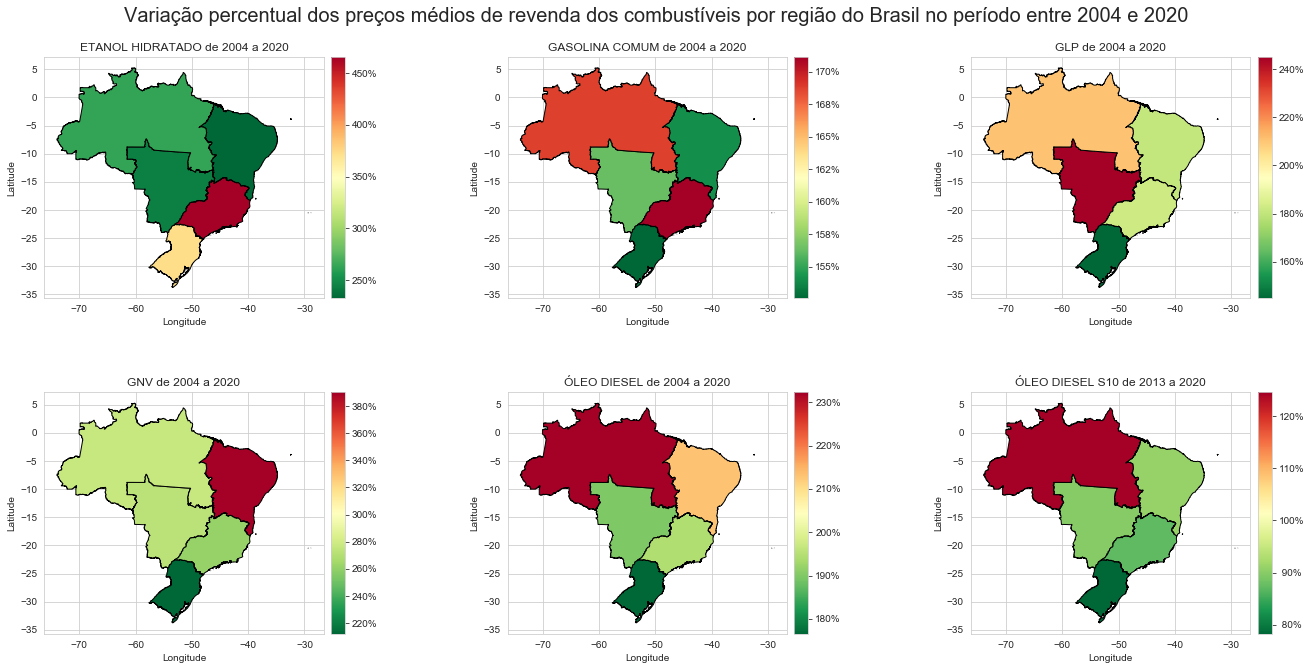

região                                           geometry  \
0   CENTRO OESTE  POLYGON ((-50.51107 -12.86077, -50.51034 -12.8...   
1   CENTRO OESTE  POLYGON ((-50.51107 -12.86077, -50.51034 -12.8...   
2   CENTRO OESTE  POLYGON ((-50.51107 -12.86077, -50.51034 -12.8...   
3   CENTRO OESTE  POLYGON ((-50.51107 -12.86077, -50.51034 -12.8...   
4   CENTRO OESTE  POLYGON ((-50.51107 -12.86077, -50.51034 -12.8...   
5   CENTRO OESTE  POLYGON ((-50.51107 -12.86077, -50.51034 -12.8...   
6       NORDESTE  MULTIPOLYGON (((-38.65134 -17.94651, -38.65296...   
7       NORDESTE  MULTIPOLYGON (((-38.65134 -17.94651, -38.65296...   
8       NORDESTE  MULTIPOLYGON (((-38.65134 -17.94651, -38.65296...   
9       NORDESTE  MULTIPOLYGON (((-38.65134 -17.94651, -38.65296...   
10      NORDESTE  MULTIPOLYGON (((-38.65134 -17.94651, -38.65296...   
11      NORDESTE  MULTIPOLYGON (((-38.65134 -17.94651, -38.65296...   
12         NORTE  MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...   
13         NORTE  MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...   
14         NORTE  MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...   
15         NORTE  MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...   
16         NORTE  MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...   
17         NORTE  MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...   
18       SUDESTE  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...   
19       SUDESTE  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...   
20       SUDESTE  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...   
21       SUDESTE  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...   
22       SUDESTE  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...   
23       SUDESTE  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...   
24           SUL  MULTIPOLYGON (((-48.46837 -27.70455, -48.46868...   
25           SUL  MULTIPOLYGON (((-48.46837 -27.70455, -48.46868...   
26           SUL  MULTIPOLYGON (((-48.46837 -27.70455, -48.46868...   
27           SUL  MULTIPOLYGON (((-48.46837 -27.70455, -48.46868...   
28           SUL  MULTIPOLYGON (((-48.46837 -27.70455, -48.46868...   
29           SUL  MULTIPOLYGON (((-48.46837 -27.70455, -48.46868...   

             produto    variação  
0   ETANOL HIDRATADO  244.148021  
1     GASOLINA COMUM  156.353306  
2                GLP  245.097426  
3                GNV  272.835005  
4        ÓLEO DIESEL  190.034843  
5    ÓLEO DIESEL S10   89.873418  
6   ETANOL HIDRATADO  232.514818  
7     GASOLINA COMUM  154.027707  
8                GLP  180.713505  
9                GNV  390.153846  
10       ÓLEO DIESEL  213.328256  
11   ÓLEO DIESEL S10   91.032864  
12  ETANOL HIDRATADO  263.703100  
13    GASOLINA COMUM  168.771930  
14               GLP  210.724204  
15               GNV  277.276456  
16       ÓLEO DIESEL  232.344828  
17   ÓLEO DIESEL S10  124.585635  
18  ETANOL HIDRATADO  465.665796  
19    GASOLINA COMUM  171.133475  
20               GLP  182.566189  
21               GNV  260.843373  
22       ÓLEO DIESEL  194.542773  
23   ÓLEO DIESEL S10   87.155963  
24  ETANOL HIDRATADO  373.101952  
25    GASOLINA COMUM  152.575217  
26               GLP  144.864130  
27               GNV  212.157534  
28       ÓLEO DIESEL  176.564774  
29   ÓLEO DIESEL S10   78.271028

In [27]:
def mapa_regiao_percentual():    
    #calcular a variação percentual por região/produto
    variacao_regiao = dados[['região', 'estado', 'produto', 'preço_médio_revenda']] \
                            .groupby(['região', 'produto']) \
                            .agg({'preço_médio_revenda' : calculaVariacao})

    variacao_regiao.reset_index(inplace = True)
    variacao_regiao.rename(columns = {'preço_médio_revenda' : 'variação'}, inplace = True)

    #obter dados geográficos por região
    geo_data_regioes = geo_data.dissolve(by = 'NM_REGIAO').reset_index()[['NM_REGIAO', 'geometry']]
    geo_data_regioes.rename(columns = {'NM_REGIAO' : 'região'}, inplace = True)

    #merge com geo_data_regioes
    geo_variacao_regioes = geo_data_regioes.merge(variacao_regiao, on = 'região')

    linhas = 2
    colunas = 3

    produtos = geo_variacao_regioes.produto.unique().tolist()

    fig, ax = plt.subplots(figsize = (20, 10), nrows = linhas, ncols = colunas)

    i = 0

    for lin in range(linhas):
        for col in range(colunas):
            divider = make_axes_locatable(ax[lin, col])
            cax = divider.append_axes('right', size = '5%', pad = 0.1)

            percentuais = geo_variacao_regioes[geo_variacao_regioes.produto == produtos[i]]

            percentuais.plot(column = 'variação', legend = True, ax = ax[lin, col],
                             cmap = 'RdYlGn_r', cax = cax, edgecolor = 'black')

            anos = dados.loc[dados.produto == produtos[i], 'ano'].unique().tolist()

            ax[lin, col].set_title(produtos[i] + ' de ' + str(min(anos)) + ' a ' + str(max(anos)))
            ax[lin, col].set_xlabel('Longitude')
            ax[lin, col].set_ylabel('Latitude')

            #cax: axes on which to draw the legend in case of color map
            cax.set_yticklabels(['{0:3.0f}%'.format(ytick) for ytick in cax.get_yticks()])

            i += 1

    fig.suptitle('Variação percentual dos preços médios de revenda dos combustíveis ' +
                 'por região do Brasil no período entre 2004 e 2020', fontsize = 20)
    plt.tight_layout(pad = 5)
    plt.show()

    return geo_variacao_regioes

mapa_regiao_percentual()

### Variação percentual dos preços médios de revenda dos combustíveis por estado no período entre 2004 e 2020

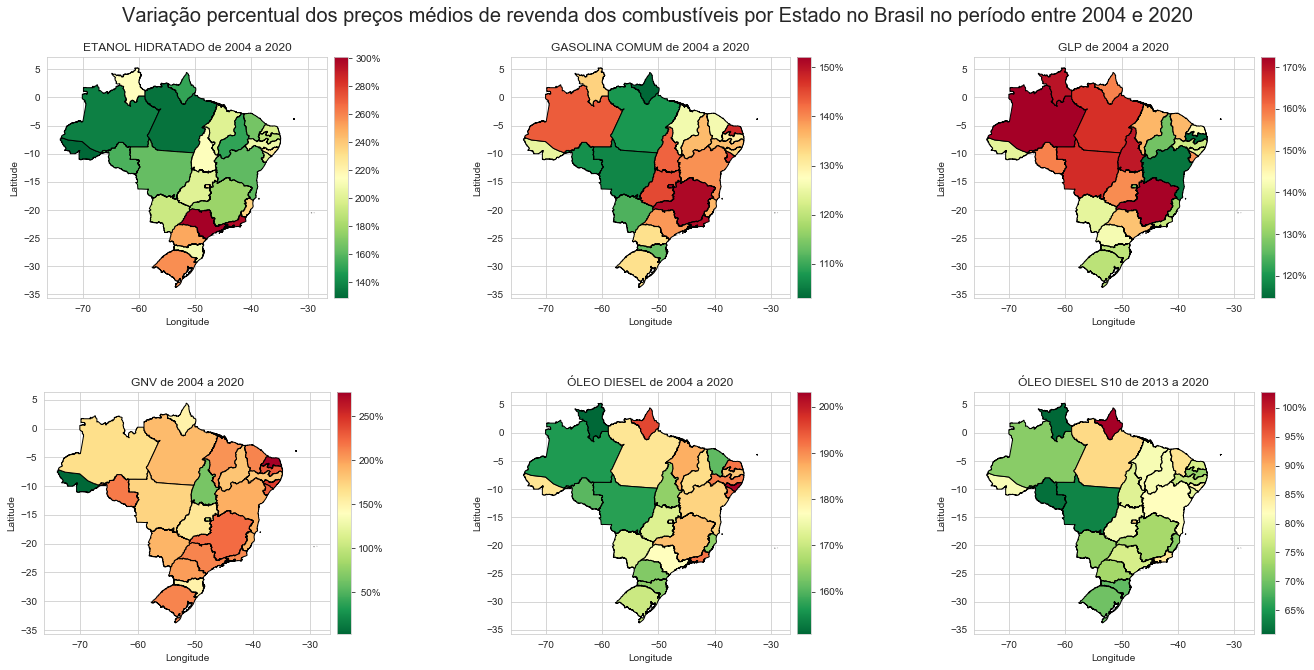

estado                                           geometry  \
0             RONDONIA  POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...   
1             RONDONIA  POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...   
2             RONDONIA  POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...   
3             RONDONIA  POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...   
4             RONDONIA  POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...   
..                 ...                                                ...   
156  RIO GRANDE DO SUL  POLYGON ((-53.03183 -27.15947, -53.02991 -27.1...   
157  RIO GRANDE DO SUL  POLYGON ((-53.03183 -27.15947, -53.02991 -27.1...   
158  RIO GRANDE DO SUL  POLYGON ((-53.03183 -27.15947, -53.02991 -27.1...   
159  RIO GRANDE DO SUL  POLYGON ((-53.03183 -27.15947, -53.02991 -27.1...   
160  RIO GRANDE DO SUL  POLYGON ((-53.03183 -27.15947, -53.02991 -27.1...   

              produto    variação  
0    ETANOL HIDRATADO  157.208089  
1      GASOLINA COMUM  107.179708  
2                 GLP  158.929976  
3                 GNV  217.391304  
4         ÓLEO DIESEL  160.594315  
..                ...         ...  
156    GASOLINA COMUM  132.208158  
157               GLP  134.285997  
158               GNV  212.157534  
159       ÓLEO DIESEL  170.270270  
160   ÓLEO DIESEL S10   70.008913  

[161 rows x 4 columns]

In [28]:
def mapa_estado_percentual():    
    #calcular a variação percentual por estado/produto
    variacao_estado = dados[['região', 'estado', 'produto', 'preço_médio_revenda']] \
                            .groupby(['estado', 'produto']) \
                            .agg({'preço_médio_revenda' : calculaVariacao})

    variacao_estado.reset_index(inplace = True)
    variacao_estado.rename(columns = {'preço_médio_revenda' : 'variação'}, inplace = True)

    #obter dados geográficos por estado
    geo_data_estado = geo_data.drop('NM_REGIAO', axis = 1)[['NM_ESTADO', 'geometry']]
    geo_data_estado.rename(columns = {'NM_ESTADO' : 'estado'}, inplace = True)

    #merge com geo_data_estado
    geo_variacao_estados = geo_data_estado.merge(variacao_estado, on = 'estado')
    
    linhas = 2
    colunas = 3

    produtos = geo_variacao_estados.produto.unique().tolist()

    fig, ax = plt.subplots(figsize = (20, 10), nrows = linhas, ncols = colunas)

    i = 0

    for lin in range(linhas):
        for col in range(colunas):
            divider = make_axes_locatable(ax[lin, col])
            cax = divider.append_axes('right', size = '5%', pad = 0.1)

            percentuais = geo_variacao_estados[geo_variacao_estados.produto == produtos[i]]

            percentuais.plot(column = 'variação', legend = True, ax = ax[lin, col],
                             cmap = 'RdYlGn_r', cax = cax, edgecolor = 'black')

            anos = dados.loc[dados.produto == produtos[i], 'ano'].unique().tolist()

            ax[lin, col].set_title(produtos[i] + ' de ' + str(min(anos)) + ' a ' + str(max(anos)))
            ax[lin, col].set_xlabel('Longitude')
            ax[lin, col].set_ylabel('Latitude')

            #cax: axes on which to draw the legend in case of color map
            cax.set_yticklabels(['{0:3.0f}%'.format(ytick) for ytick in cax.get_yticks()])

            i += 1

    fig.suptitle('Variação percentual dos preços médios de revenda dos combustíveis ' +
                 'por Estado no Brasil no período entre 2004 e 2020', fontsize = 20)
    plt.tight_layout(pad = 5)
    plt.show()

    return geo_variacao_estados

mapa_estado_percentual()

### Preço médio dos combustíveis por Estado no período entre 2004 e 2020

C:\Users\davir\Anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\davir\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


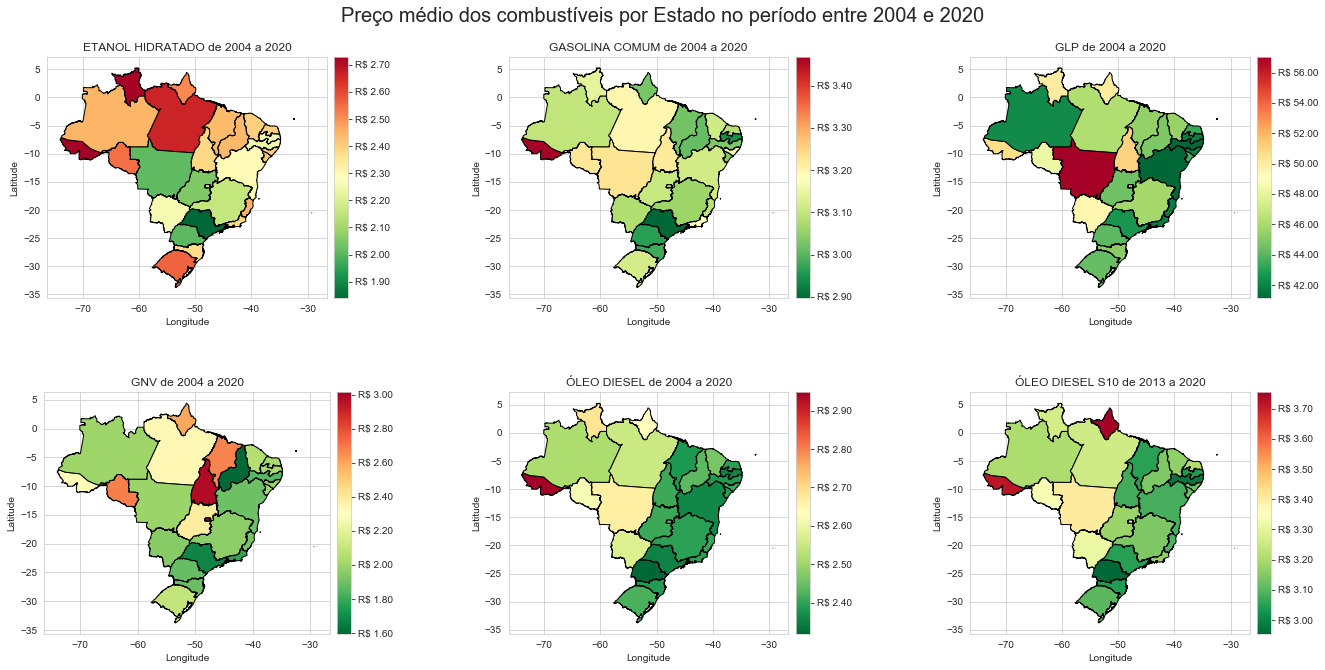

estado                                           geometry  \
0             RONDONIA  POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...   
1             RONDONIA  POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...   
2             RONDONIA  POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...   
3             RONDONIA  POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...   
4             RONDONIA  POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...   
..                 ...                                                ...   
156  RIO GRANDE DO SUL  POLYGON ((-53.03183 -27.15947, -53.02991 -27.1...   
157  RIO GRANDE DO SUL  POLYGON ((-53.03183 -27.15947, -53.02991 -27.1...   
158  RIO GRANDE DO SUL  POLYGON ((-53.03183 -27.15947, -53.02991 -27.1...   
159  RIO GRANDE DO SUL  POLYGON ((-53.03183 -27.15947, -53.02991 -27.1...   
160  RIO GRANDE DO SUL  POLYGON ((-53.03183 -27.15947, -53.02991 -27.1...   

              produto  preço_médio  
0    ETANOL HIDRATADO     2.545254  
1      GASOLINA COMUM     3.225130  
2                 GLP    48.330488  
3                 GNV     2.689200  
4         ÓLEO DIESEL     2.619567  
..                ...          ...  
156    GASOLINA COMUM     3.121429  
157               GLP    44.345631  
158               GNV     2.100125  
159       ÓLEO DIESEL     2.423821  
160   ÓLEO DIESEL S10     3.101523  

[161 rows x 4 columns]

In [29]:
def mapa_estado_combustivel():    
    #calcular a média do preço médio de revenda por estado/produto
    preco_estado = dados[['região', 'estado', 'produto', 'preço_médio_revenda']] \
                        .groupby(['estado', 'produto']) \
                        .agg({'preço_médio_revenda' : np.average})

    preco_estado.reset_index(inplace = True)
    preco_estado.rename(columns = {'preço_médio_revenda' : 'preço_médio'}, inplace = True)

    #obter dados geográficos por estado
    geo_data_estado = geo_data.drop('NM_REGIAO', axis = 1)[['NM_ESTADO', 'geometry']]
    geo_data_estado.rename(columns = {'NM_ESTADO' : 'estado'}, inplace = True)

    #merge com geo_data_estado
    geo_precos_estados = geo_data_estado.merge(preco_estado, on = 'estado')
    
    linhas = 2
    colunas = 3

    produtos = geo_precos_estados.produto.unique().tolist()

    fig, ax = plt.subplots(figsize = (20, 10), nrows = linhas, ncols = colunas)

    i = 0

    for lin in range(linhas):
        for col in range(colunas):
            divider = make_axes_locatable(ax[lin, col])
            cax = divider.append_axes('right', size = '5%', pad = 0.1)

            precos = geo_precos_estados[geo_precos_estados.produto == produtos[i]]

            precos.plot(column = 'preço_médio', legend = True, ax = ax[lin, col],
                        cmap = 'RdYlGn_r', cax = cax, edgecolor = 'black')

            anos = dados.loc[dados.produto == produtos[i], 'ano'].unique().tolist()

            ax[lin, col].set_title(produtos[i] + ' de ' + str(min(anos)) + ' a ' + str(max(anos)))
            ax[lin, col].set_xlabel('Longitude')
            ax[lin, col].set_ylabel('Latitude')

            #cax: axes on which to draw the legend in case of color map
            cax.set_yticklabels(['R$ {0:2.2f}'.format(ytick) for ytick in cax.get_yticks()])

            i += 1

    fig.suptitle('Preço médio dos combustíveis por Estado no período entre 2004 e 2020', fontsize = 20)
    plt.tight_layout(pad = 5)
    plt.show()

    return geo_precos_estados

mapa_estado_combustivel()

### Comparação de combustíveis por Estado

C:\Users\davir\Anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\davir\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


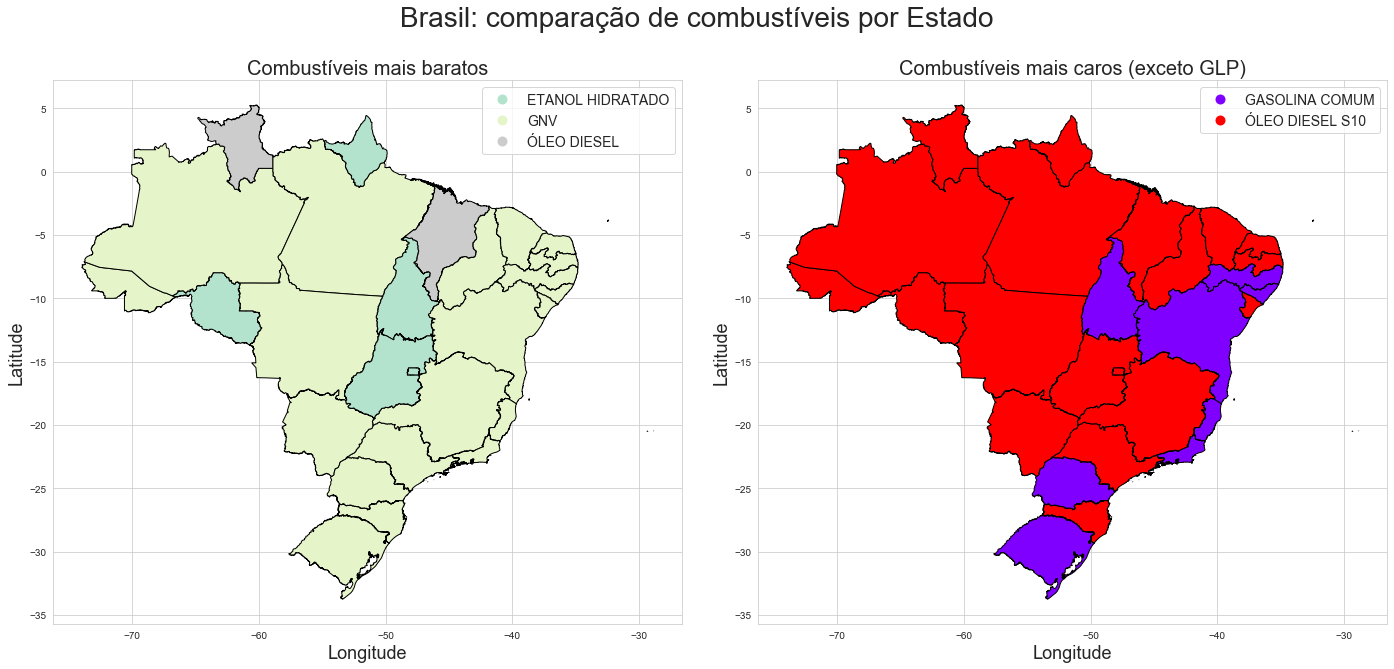

In [30]:
def comparacao_combustivel_estado():
    preco_estado = dados[['região', 'estado', 'produto', 'preço_médio_revenda']] \
                        .groupby(['estado', 'produto']) \
                        .agg({'preço_médio_revenda' : np.average})

    preco_estado.reset_index(inplace = True)
    preco_estado.rename(columns = {'preço_médio_revenda' : 'preço_médio'}, inplace = True)

    #obter dados geográficos por estado
    geo_data_estado = geo_data.drop('NM_REGIAO', axis = 1)[['NM_ESTADO', 'geometry']]
    geo_data_estado.rename(columns = {'NM_ESTADO' : 'estado'}, inplace = True)

    #merge com geo_data_estado
    geo_precos_estados = geo_data_estado.merge(preco_estado, on = 'estado')

    mais_baratos, mais_caros = pd.DataFrame(), pd.DataFrame()
    estados = geo_precos_estados.estado.unique().tolist()

    for e in estados:
        grupo_estado = geo_precos_estados[geo_precos_estados.produto != 'GLP'].groupby('estado').get_group(e)

        combustivel = grupo_estado[grupo_estado.preço_médio == grupo_estado.preço_médio.min()]
        mais_baratos = mais_baratos.append(combustivel)

        combustivel = grupo_estado[grupo_estado.preço_médio == grupo_estado.preço_médio.max()]
        mais_caros = mais_caros.append(combustivel)

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10))

    #choropleths of cheapest and most expensive fuels
    mais_baratos.plot(column = 'produto', cmap = 'Pastel2', ax = ax[0], 
                      edgecolor = 'black', legend = True, legend_kwds = {'fontsize' : 14})
    
    mais_caros.plot(column = 'produto', cmap = 'rainbow', ax = ax[1], 
                    edgecolor = 'black', legend = True, legend_kwds = {'fontsize' : 14})

    #format figure and axes
    ax[0].set_title('Combustíveis mais baratos', fontsize = 20)
    ax[0].set_xlabel('Longitude', fontsize = 18)
    ax[0].set_ylabel('Latitude', fontsize = 18)
        
    ax[1].set_title('Combustíveis mais caros (exceto GLP)', fontsize = 20)
    ax[1].set_xlabel('Longitude', fontsize = 18)
    ax[1].set_ylabel('Latitude', fontsize = 18)

    plt.suptitle('Brasil: comparação de combustíveis por Estado', fontsize = 28)
    plt.tight_layout(pad = 3)
    plt.show()

comparacao_combustivel_estado()